In [1]:
import pandas as pd

In [30]:
#open reults file: 
results_1 = pd.read_csv('lending\\run_20250110-123340_Acc_0.4_Fair_0.2\\final_ranked_decision_metrics.csv')
results_cv_1= pd.read_csv('lending\\run_20250110-123340_Acc_0.4_Fair_0.2\\cv_ranked_decision_metrics.csv')
results_2 = pd.read_csv('lending\\run_20250110-122446_Acc_0.4_Fair_0.2\\final_ranked_decision_metrics.csv')
results_cv_2= pd.read_csv('lending\\run_20250110-122446_Acc_0.4_Fair_0.2\\cv_ranked_decision_metrics.csv')
results_3 = pd.read_csv('lending\\run_20250110-120722_Acc_0.4_Fair_0.2\\final_ranked_decision_metrics.csv')
results_cv_3= pd.read_csv('lending\\run_20250110-120722_Acc_0.4_Fair_0.2\\cv_ranked_decision_metrics.csv')
results_4 = pd.read_csv('lending\\run_20250110-115814_Acc_0.4_Fair_0.2\\final_ranked_decision_metrics.csv')
results_cv_4= pd.read_csv('lending\\run_20250110-115814_Acc_0.4_Fair_0.2\\cv_ranked_decision_metrics.csv')
result_files= [results_1, results_2, results_3, results_4]
result_cv_files= [results_cv_1, results_cv_2, results_cv_3, results_cv_4]

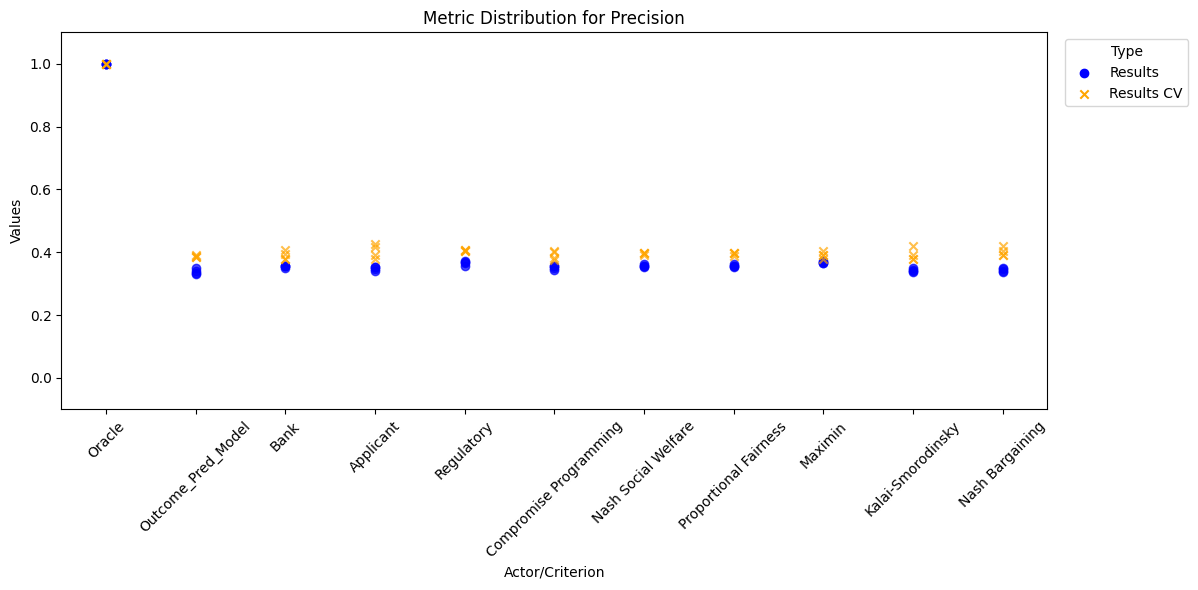

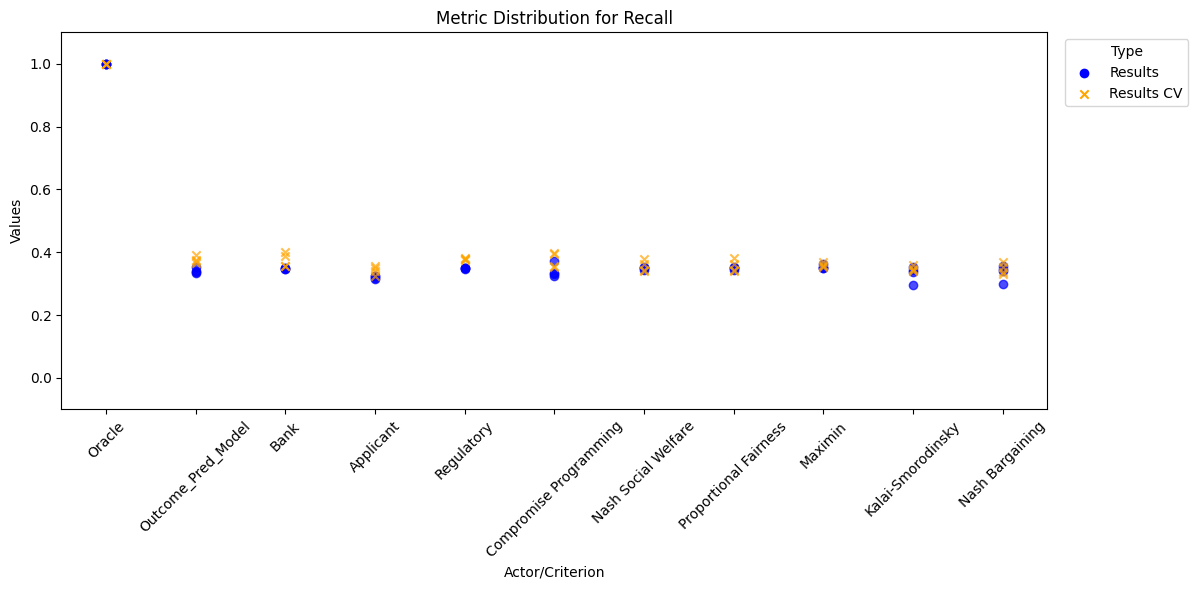

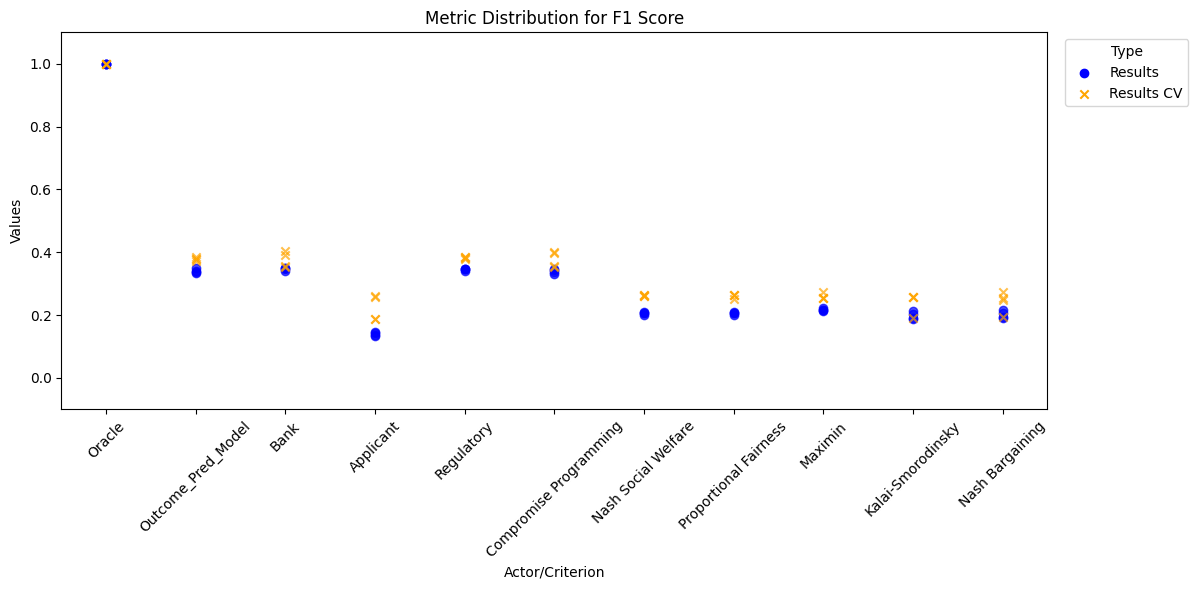

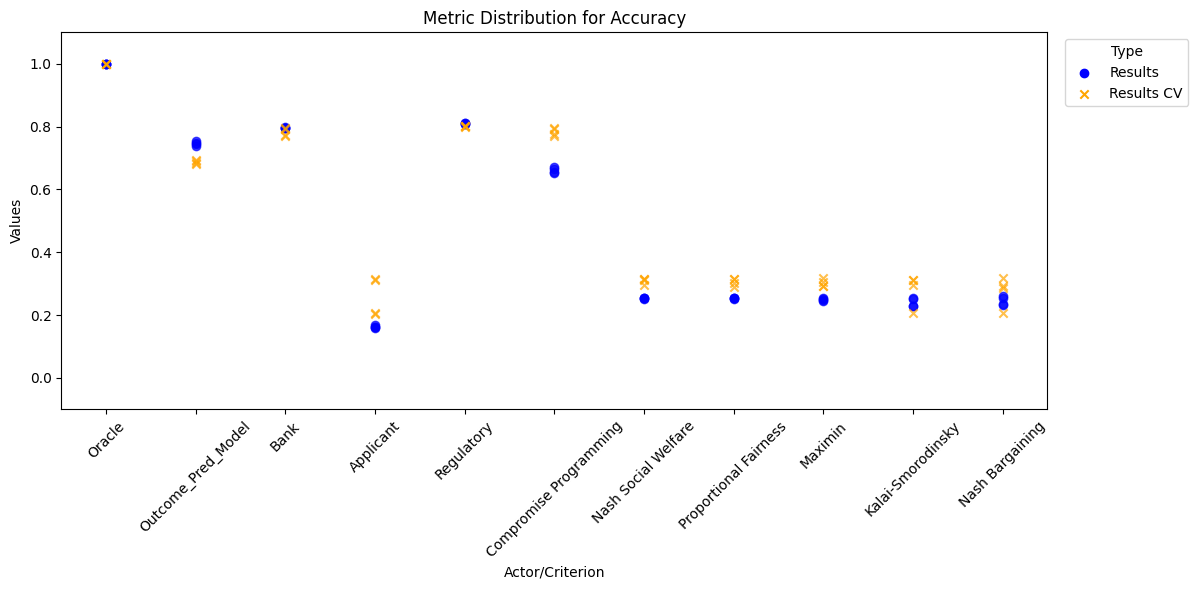

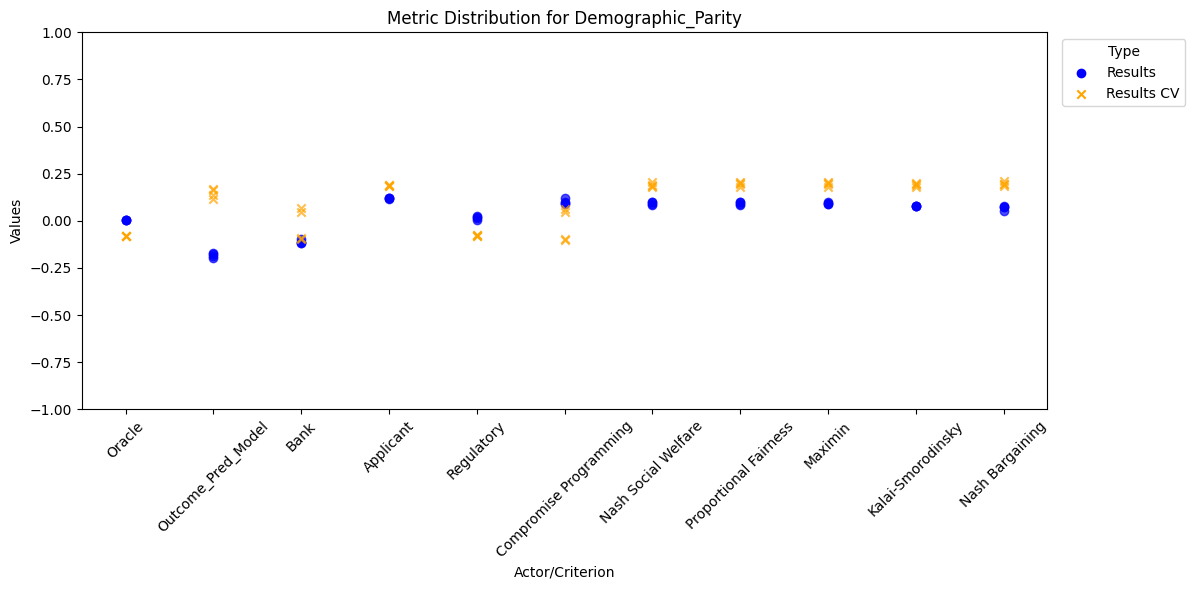

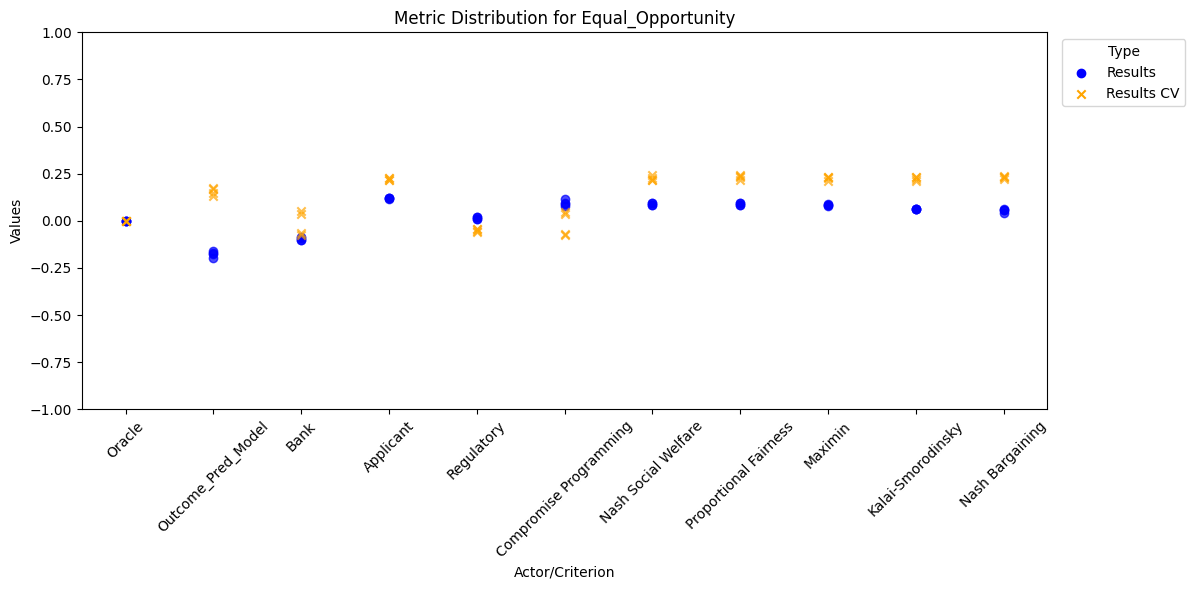

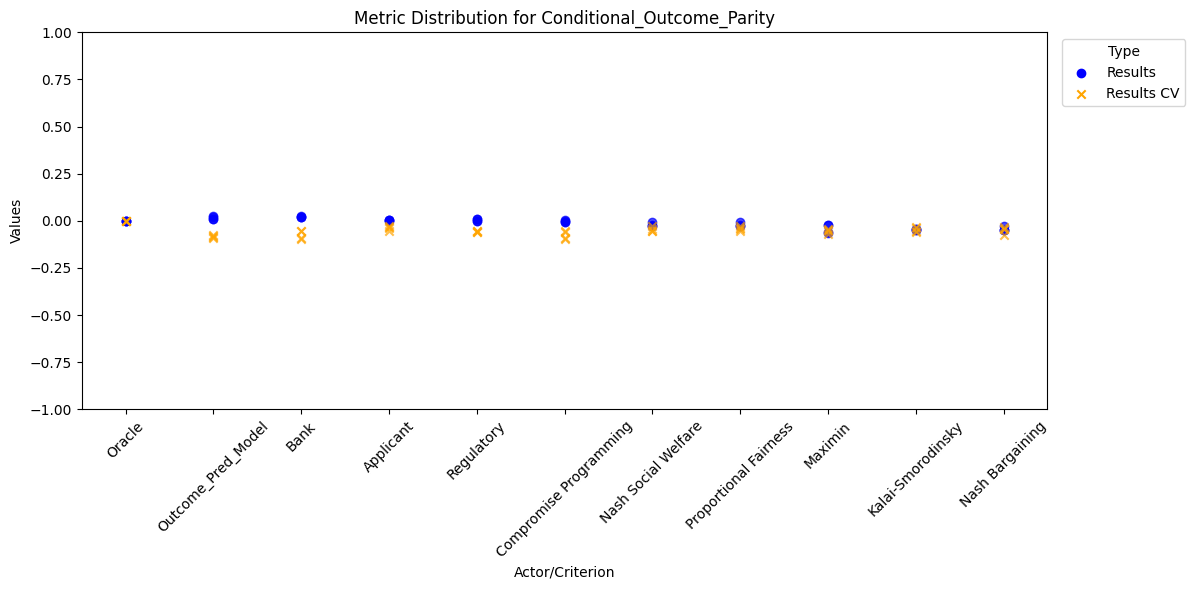

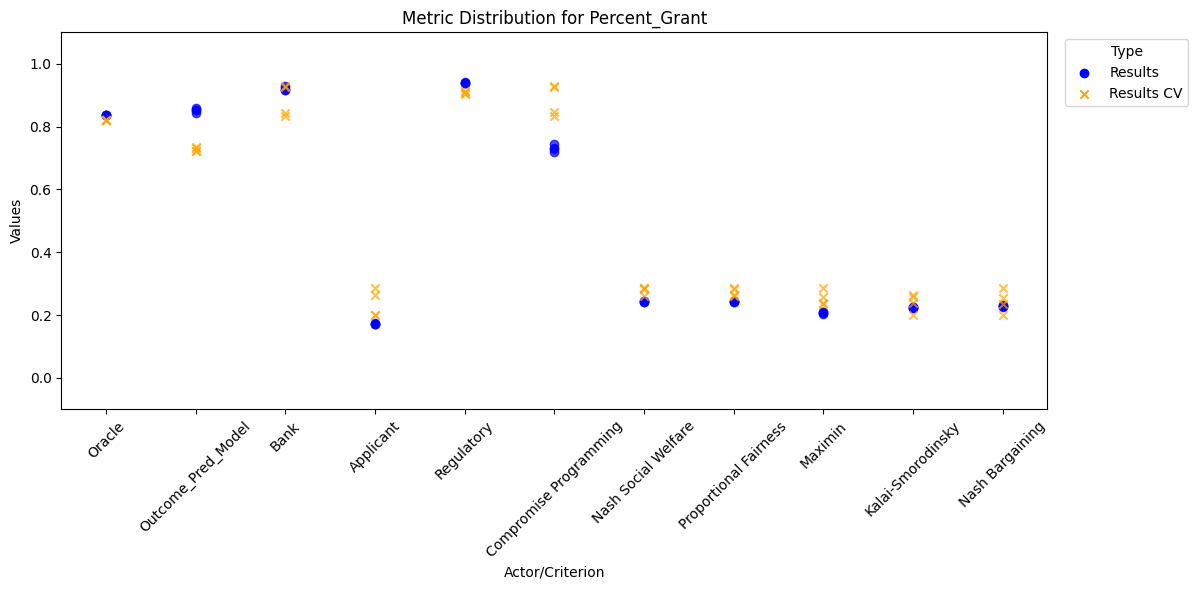

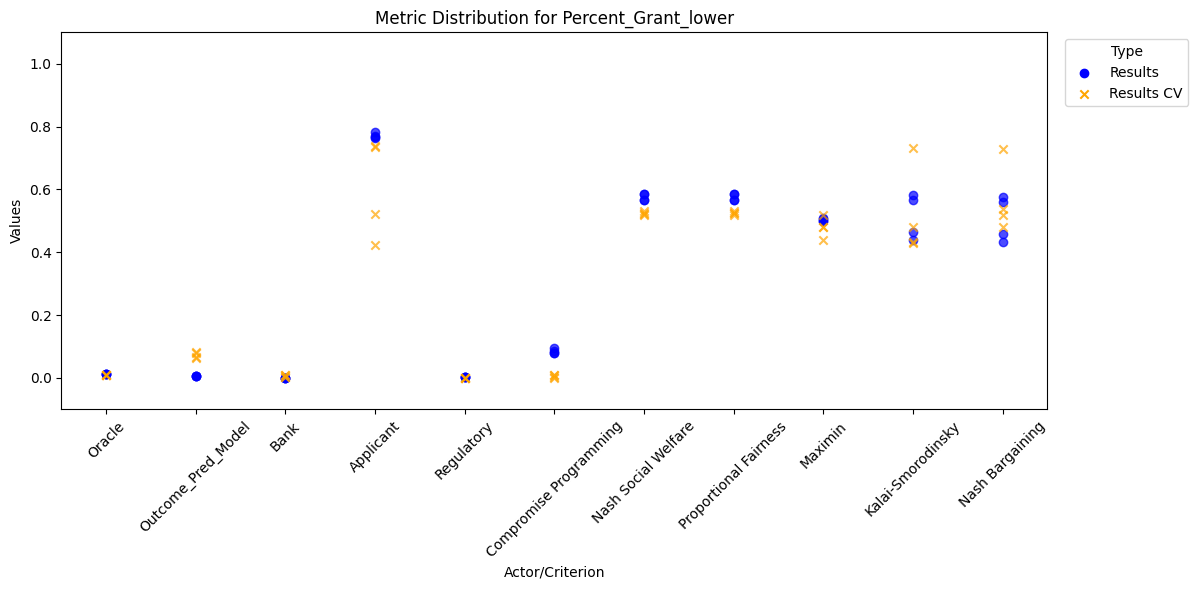

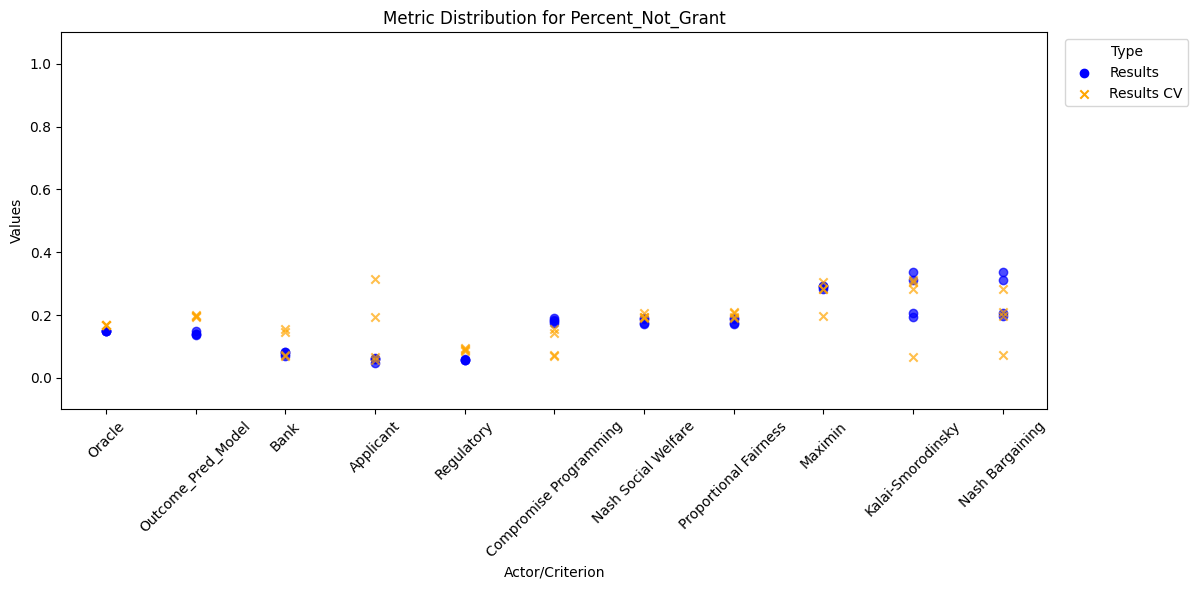

In [31]:
comparison_dict = {}
normalized_dict = {}    
# Process each pair of files
for result_file, result_cv_file in zip(result_files, result_cv_files):
    # Iterate over columns excluding the first one
    for col in result_file.columns[1:]:
        if col not in comparison_dict:
            comparison_dict[col] = {}
        if "Normalized" in col and col not in normalized_dict:
            normalized_dict[col] = {}
        # Iterate over rows (index is the first column "Actor/criterion")
        for index, row in result_file.iterrows():
            actor = row["Actor/Criterion"]
            # Initialize nested structure if not present
            if actor not in comparison_dict[col]:
                comparison_dict[col][actor] = {"results": [], "results_cv": []}
            if "Normalized" in col and actor not in normalized_dict[col]:
                normalized_dict[col][actor] = {"results": [], "results_cv": []}
            
            # Append values to the lists
            comparison_dict[col][actor]["results"].append(row[col])
            comparison_dict[col][actor]["results_cv"].append(result_cv_file.loc[index, col])
            if "Normalized" in col:
                normalized_dict[col][actor]["results"].append(row[col])
                normalized_dict[col][actor]["results_cv"].append(result_cv_file.loc[index, col])


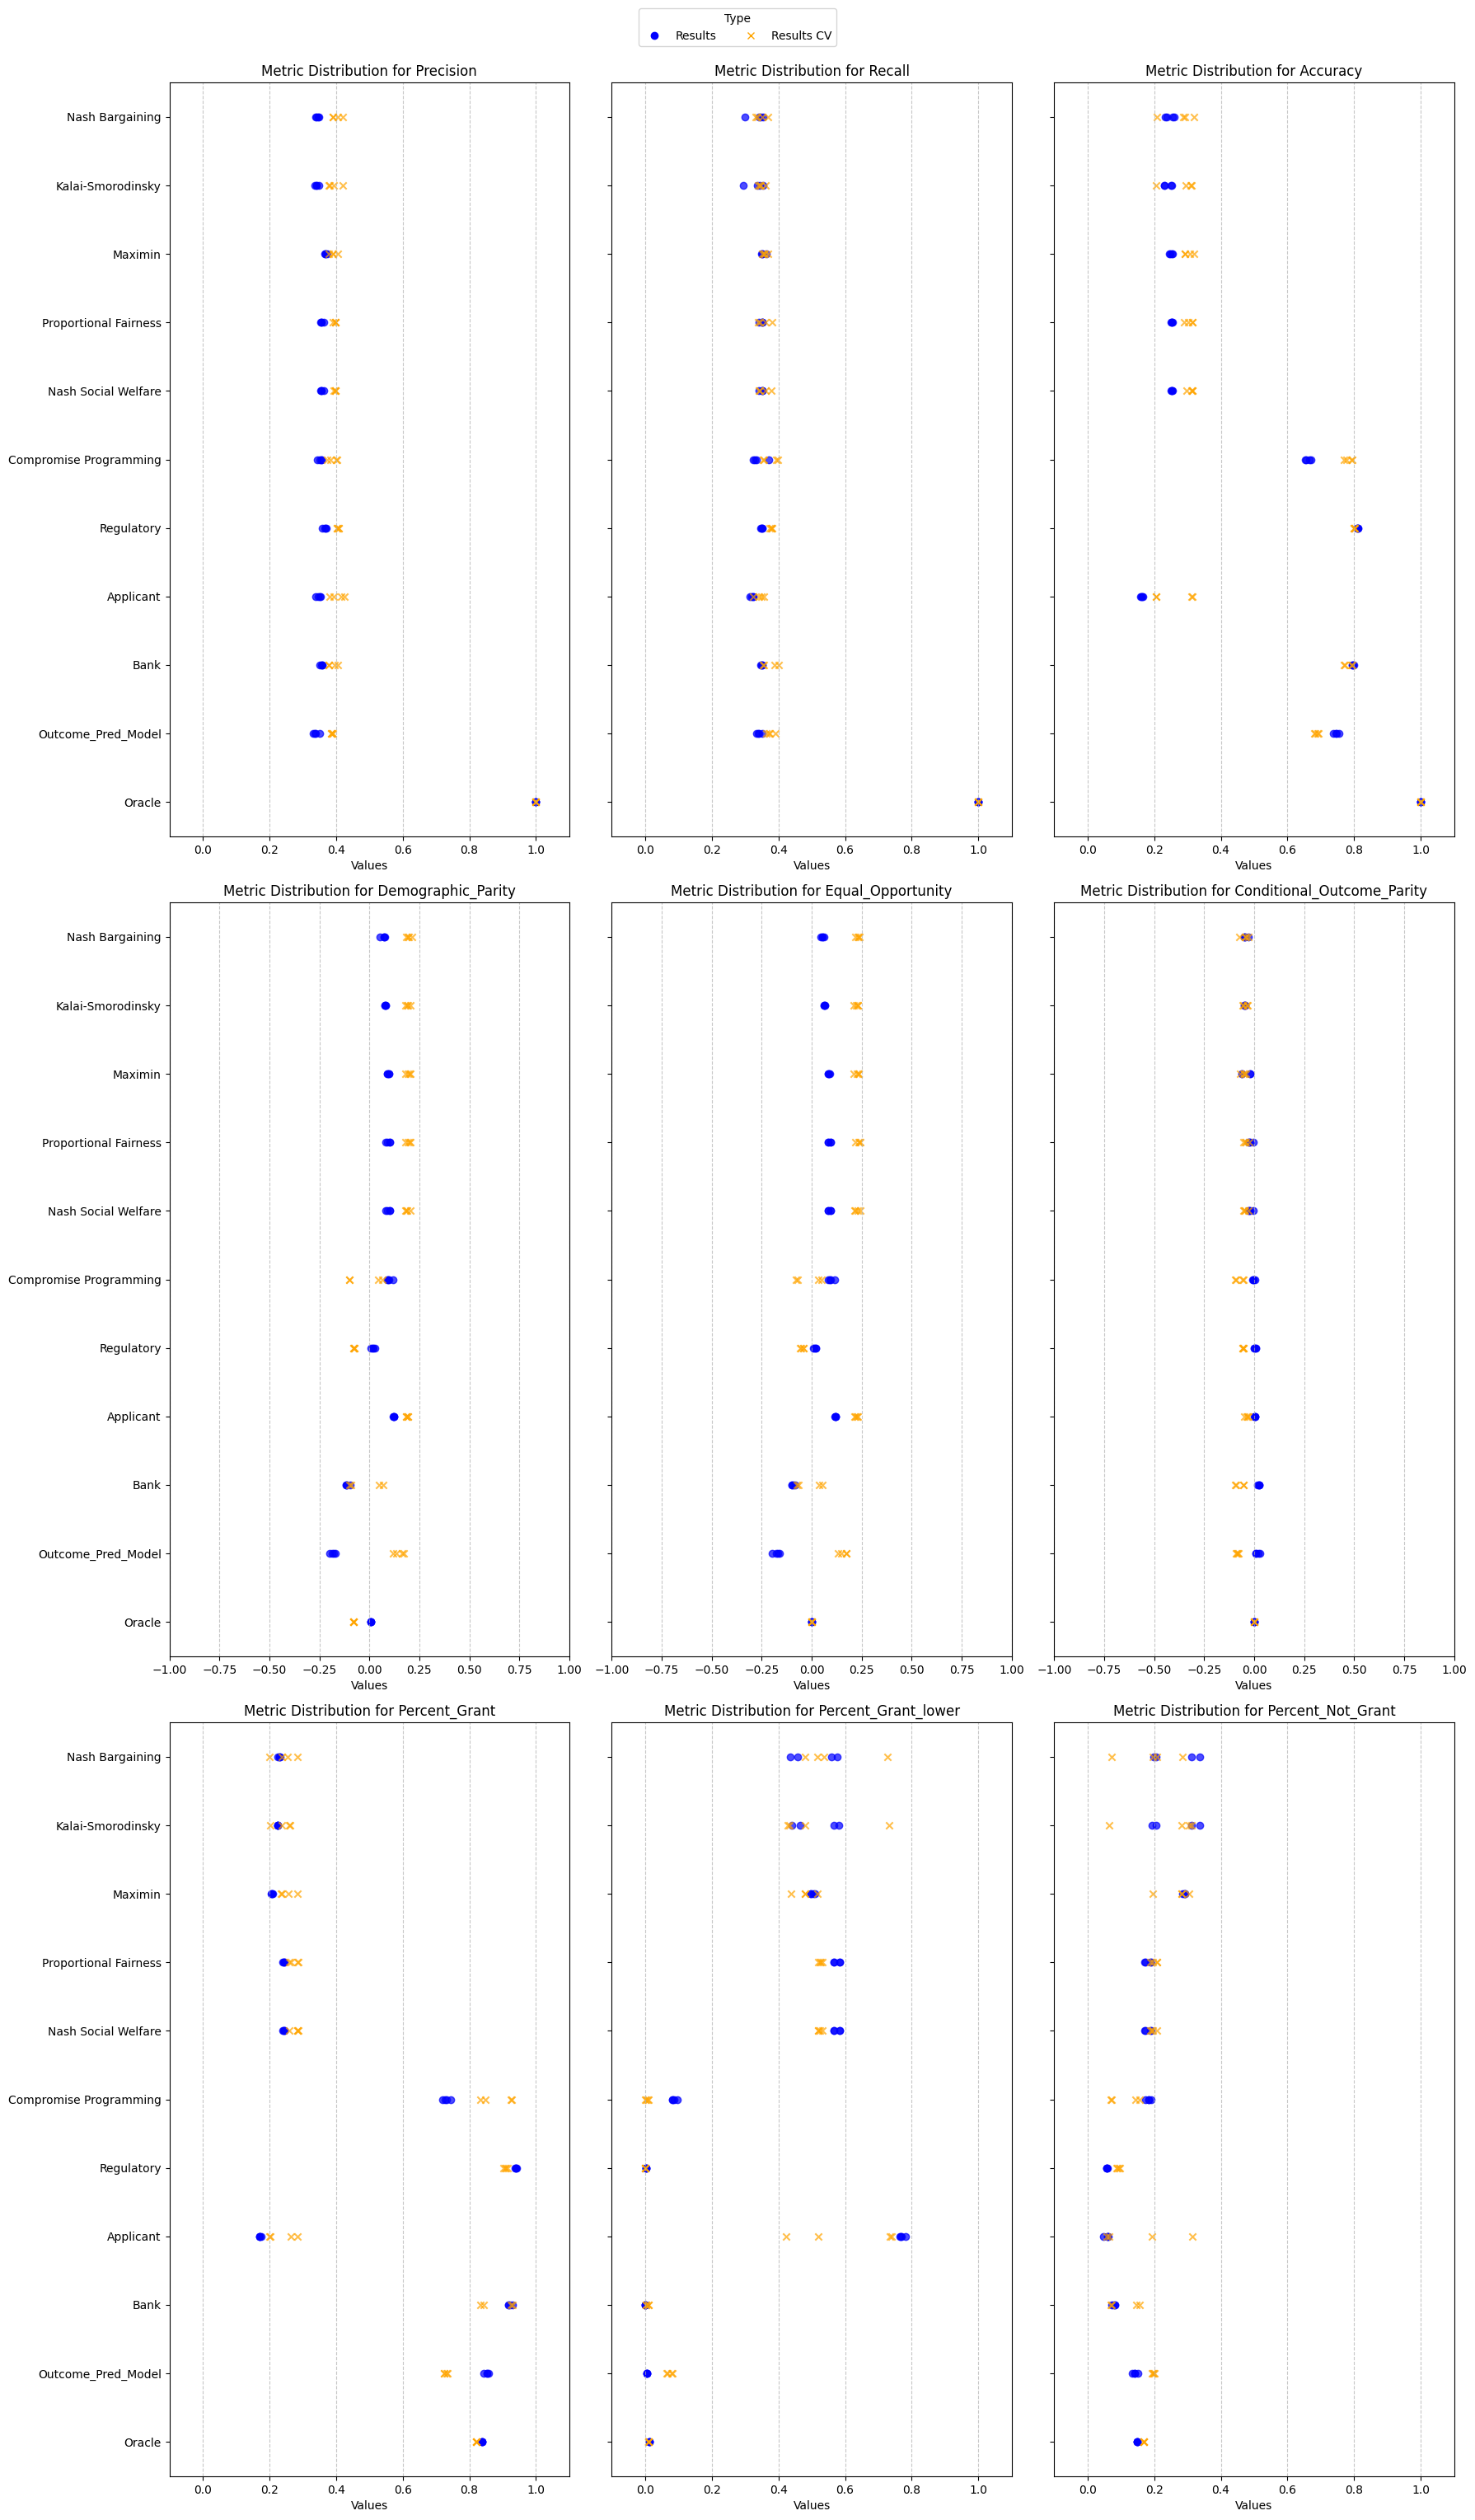

In [66]:
import matplotlib.pyplot as plt
import math

def visualize_selected_metrics_horizontal_rows(data_dict, selected_metrics, title_prefix="Comparison"):
    """
    Visualizes the distributions in the dictionary for selected outer keys using scatter plots,
    with actors/criteria on the vertical axis and metric values on the horizontal axis,
    organizing metrics in rows of three per row.
    
    Parameters:
        data_dict: dict
            Nested dictionary with the structure:
            {outer_key: {inner_key: {"results": [values], "results_cv": [values]}}}
        selected_metrics: list
            List of outer keys (metrics) to visualize.
        title_prefix: str
            Prefix for the plot titles.
    """
    # Custom Y-axis order
    y_order = [
        'Oracle', 'Outcome_Pred_Model', 'Bank', 'Applicant', 'Regulatory', 
        'Compromise Programming', 'Nash Social Welfare', 'Proportional Fairness',
        'Maximin', 'Kalai-Smorodinsky', 'Nash Bargaining'
    ]
    
    metrics_per_row = 3
    num_metrics = len(selected_metrics)
    num_rows = math.ceil(num_metrics / metrics_per_row)

    fig, axes = plt.subplots(num_rows, metrics_per_row, figsize=(6 * metrics_per_row, 10 * num_rows), sharey=True)
    axes = axes.flatten()  # Flatten to make indexing simpler

    for i, outer_key in enumerate(selected_metrics):
        ax = axes[i]
        if outer_key in data_dict:
            # Prepare data for scatter plot
            for actor in y_order:
                if actor in data_dict[outer_key]:
                    values = data_dict[outer_key][actor]
                    # Scatter plot for "results"
                    ax.scatter(
                        values["results"],  # X-axis: results values
                        [actor] * len(values["results"]),  # Y-axis: actor repeated for each value
                        alpha=0.7,
                        marker='o',
                        color='blue',
                        label='Results' if actor == y_order[0] else None  # Add label once
                    )
                    # Scatter plot for "results_cv"
                    ax.scatter(
                        values["results_cv"],
                        [actor] * len(values["results_cv"]),
                        alpha=0.7,
                        marker='x',
                        color='orange',
                        label='Results CV' if actor == y_order[0] else None  # Add label once
                    )

            # Set custom x-axis range
            if outer_key in ['Demographic_Parity', 'Equal_Opportunity', 'Conditional_Outcome_Parity']:
                ax.set_xlim(-1, 1)
            else:
                ax.set_xlim(-0.1, 1.1)

            # Add labels and title
            ax.set_xlabel("Values")
            ax.set_title(f"{title_prefix} for {outer_key}")
            ax.grid(axis='x', linestyle='--', alpha=0.7)

    # Remove unused subplots
    for j in range(num_metrics, len(axes)):
        fig.delaxes(axes[j])

    # Set shared y-axis labels
    axes[0].set_yticks(range(len(y_order)))
    axes[0].set_yticklabels(y_order)

    # Add a single legend
    handles = [
        plt.Line2D([], [], color='blue', marker='o', linestyle='None', label='Results'),
        plt.Line2D([], [], color='orange', marker='x', linestyle='None', label='Results CV')
    ]
    fig.legend(handles=handles, loc='upper center', ncol=2, title="Type", bbox_to_anchor=(0.5, 1.02))

    plt.tight_layout()
    plt.show()

# Selected outer keys (metrics)
selected_metrics = [
    'Precision', 'Recall', 'Accuracy', 'Demographic_Parity',
    'Equal_Opportunity', 'Conditional_Outcome_Parity', 'Percent_Grant',
    'Percent_Grant_lower', 'Percent_Not_Grant'
]

# Use the function with 3 metrics per row
visualize_selected_metrics_horizontal_rows(comparison_dict, selected_metrics)


In [46]:
comparison_dict.keys()


dict_keys(['Total_Profit', 'Total_Loss', 'Unexploited_Profit', 'Precision', 'Recall', 'F1 Score', 'Accuracy', 'Demographic_Parity', 'Equal_Opportunity', 'Conditional_Outcome_Parity', 'Percent_Grant', 'Percent_Grant_lower', 'Percent_Not_Grant', 'Total Real Payoff (Bank)', 'Total Real Payoff (Applicant)', 'Total Real Payoff (Regulatory)', 'Demographic_Parity Normalized', 'Equal_Opportunity Normalized', 'Conditional_Outcome_Parity Normalized', 'Total_Profit Normalized', 'Accuracy Normalized', 'Unexploited_Profit Normalized', 'Total_Loss Normalized', 'Demographic_Parity Rank', 'Equal_Opportunity Rank', 'Conditional_Outcome_Parity Rank', 'Total_Profit Rank', 'Accuracy Rank', 'Unexploited_Profit Rank', 'Total_Loss Rank', 'Weighted Normalized-Sum'])

In [41]:
comparison_dict['Demographic_Parity Normalized']['Nash Social Welfare']

{'results': [0.5293023255813952,
  0.5251908396946564,
  0.4861902674265672,
  0.4323252354982652],
 'results_cv': [0.0296064729680031,
  0.0308909777456416,
  0.067442794058611,
  0.0826514232019107]}

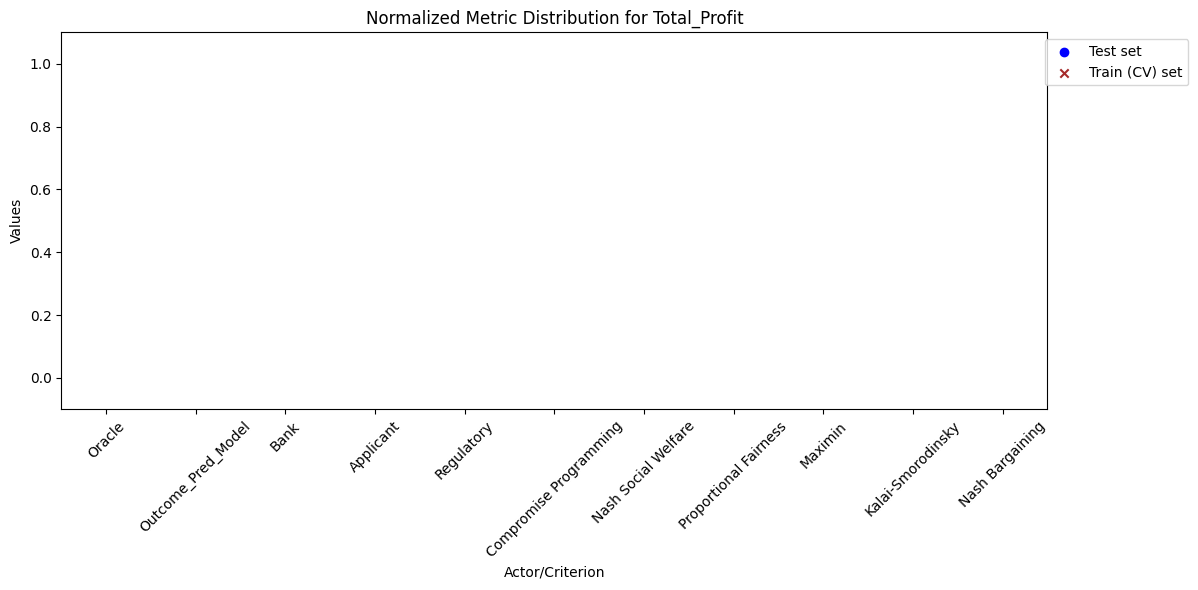

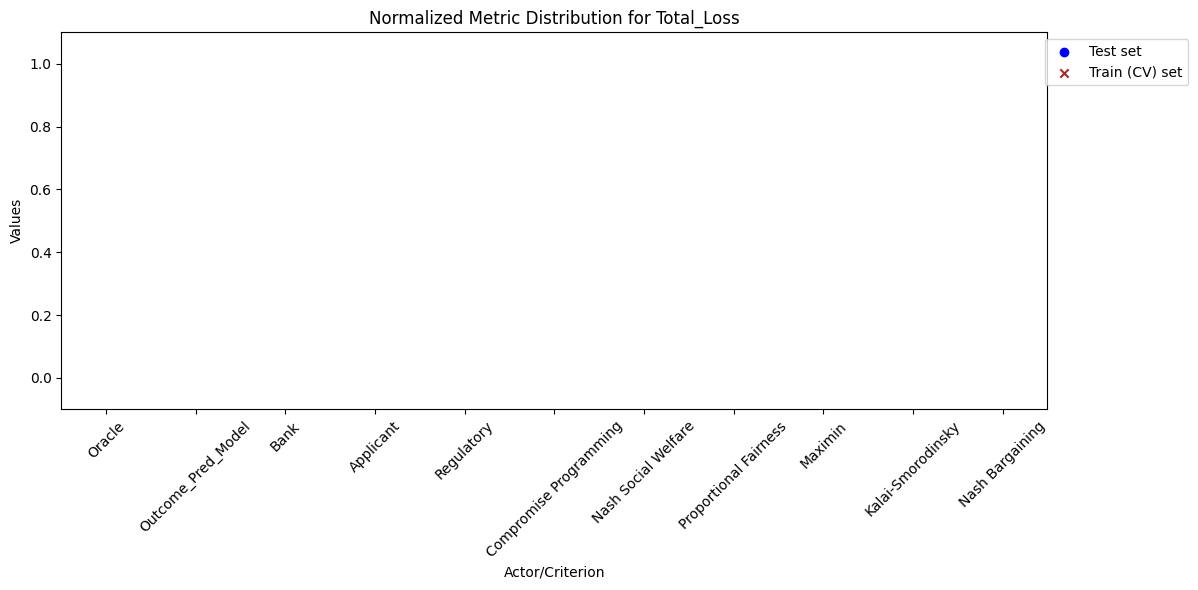

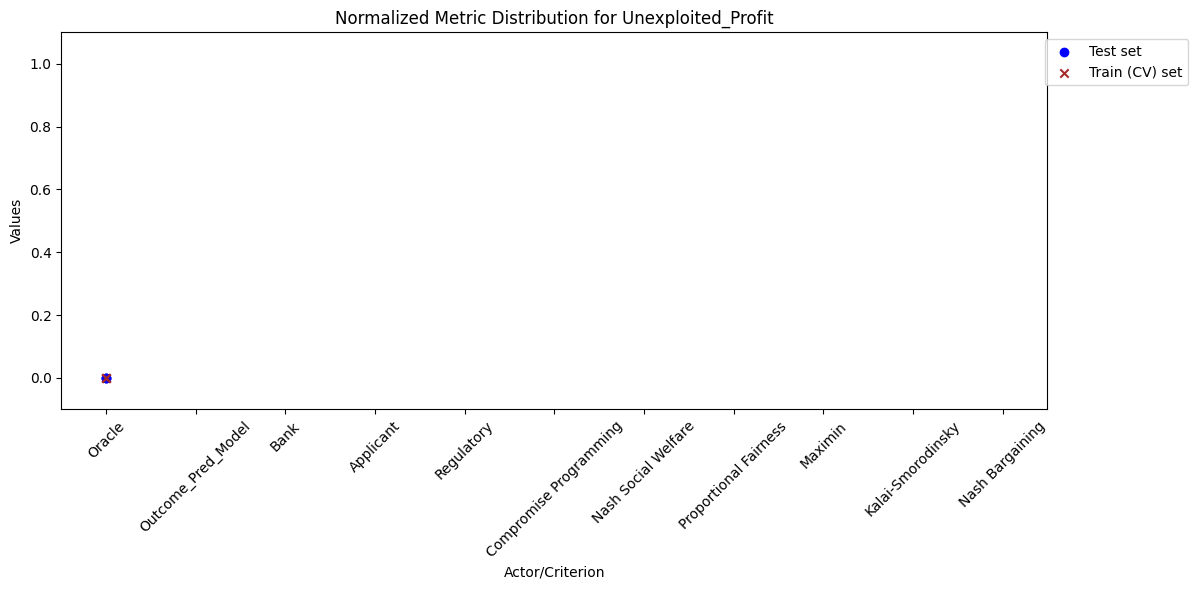

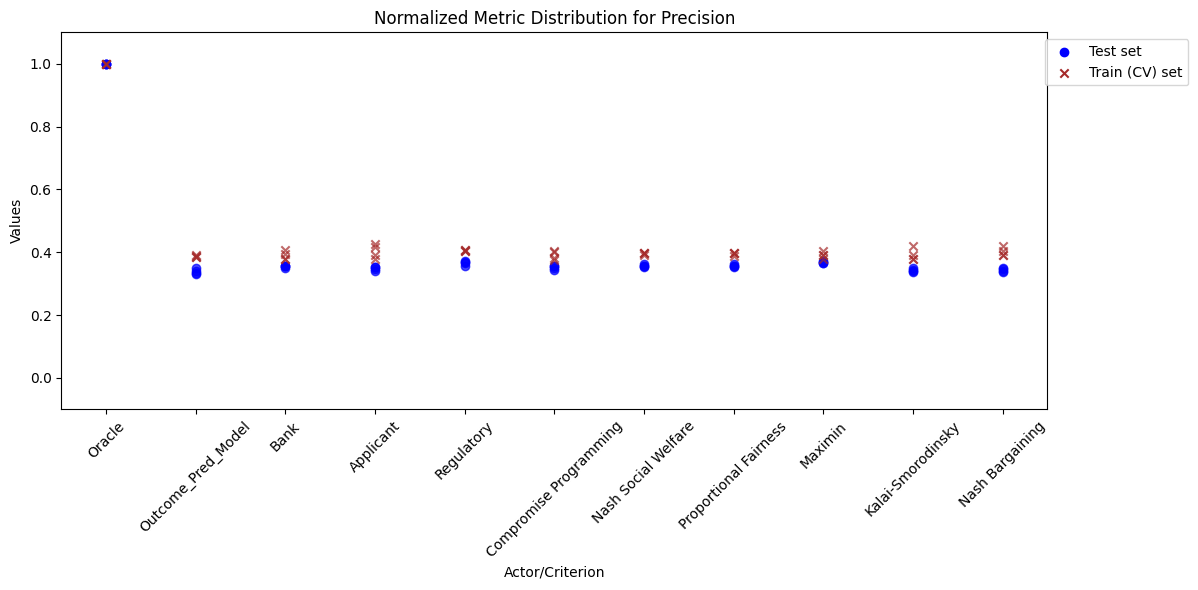

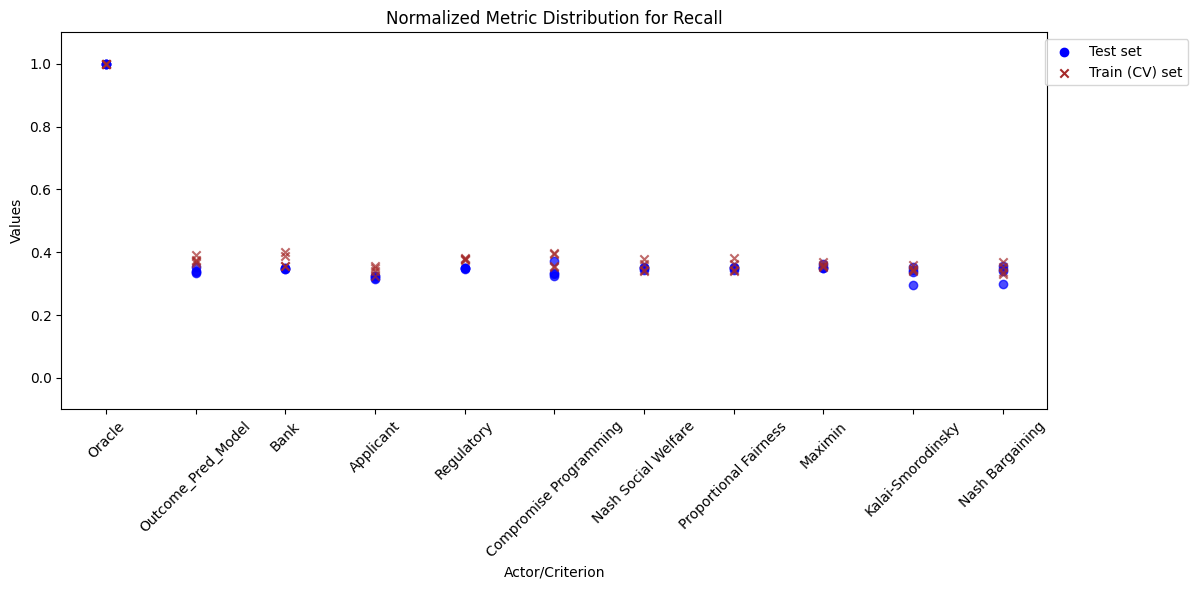

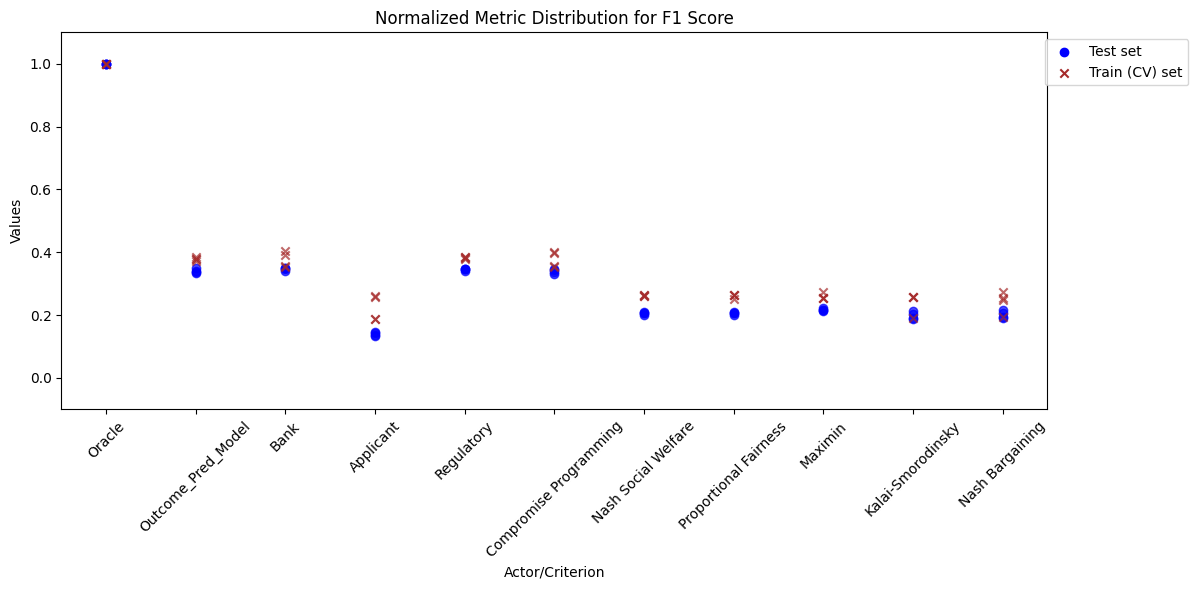

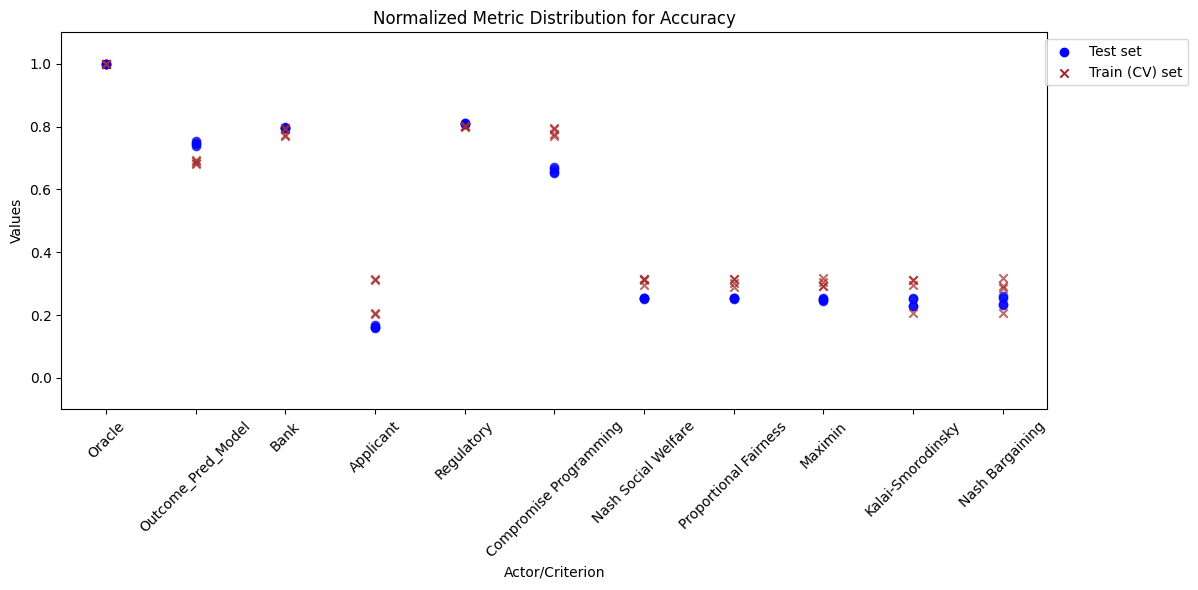

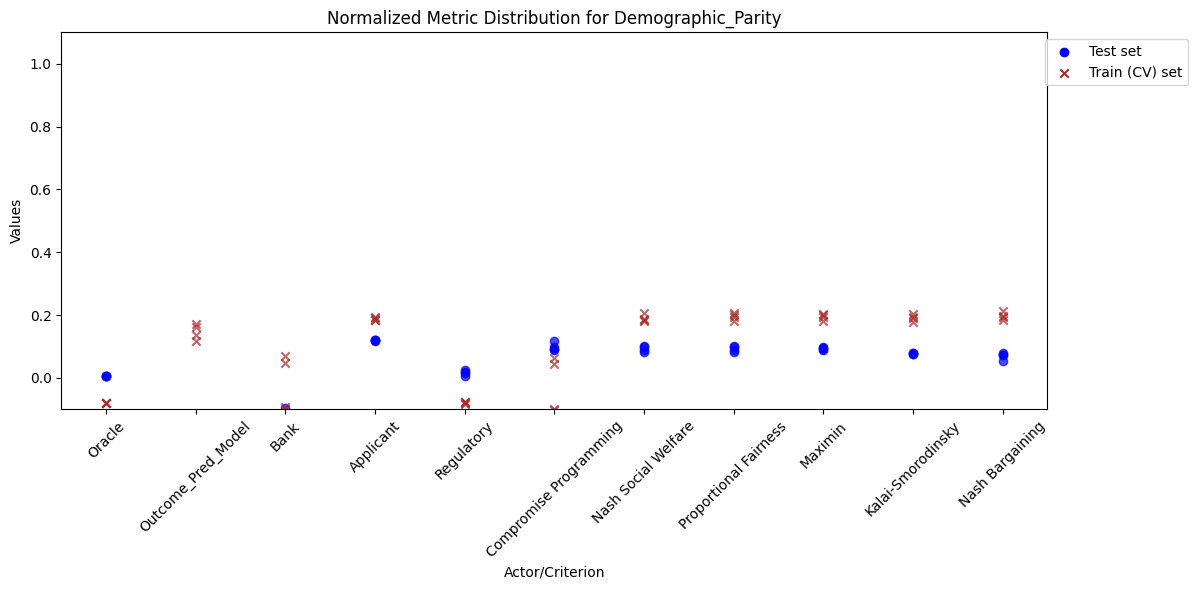

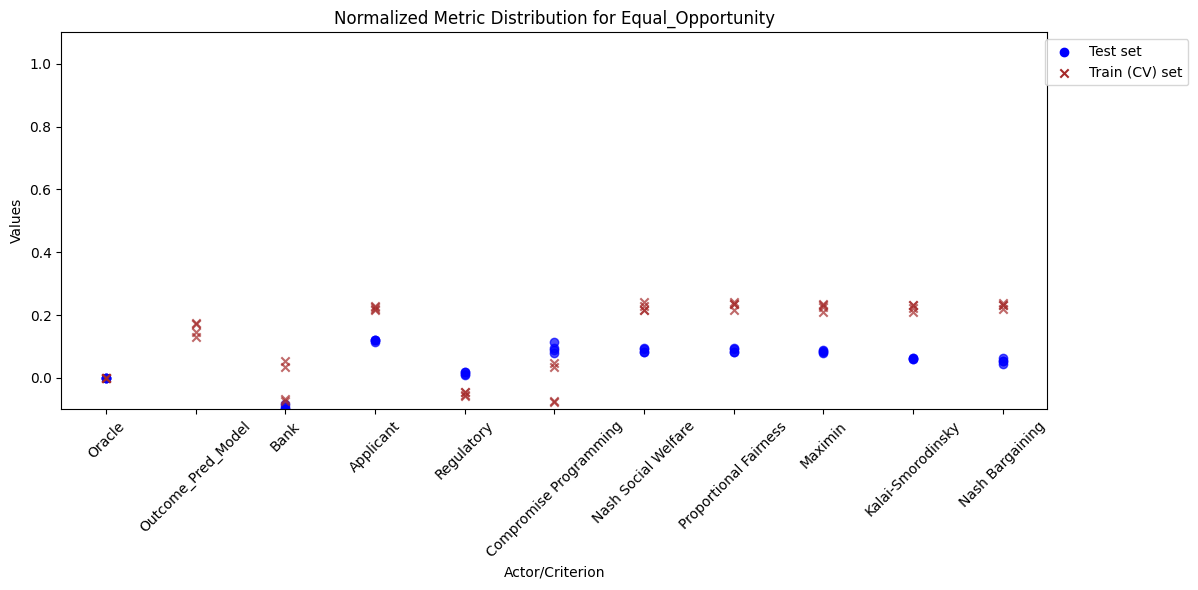

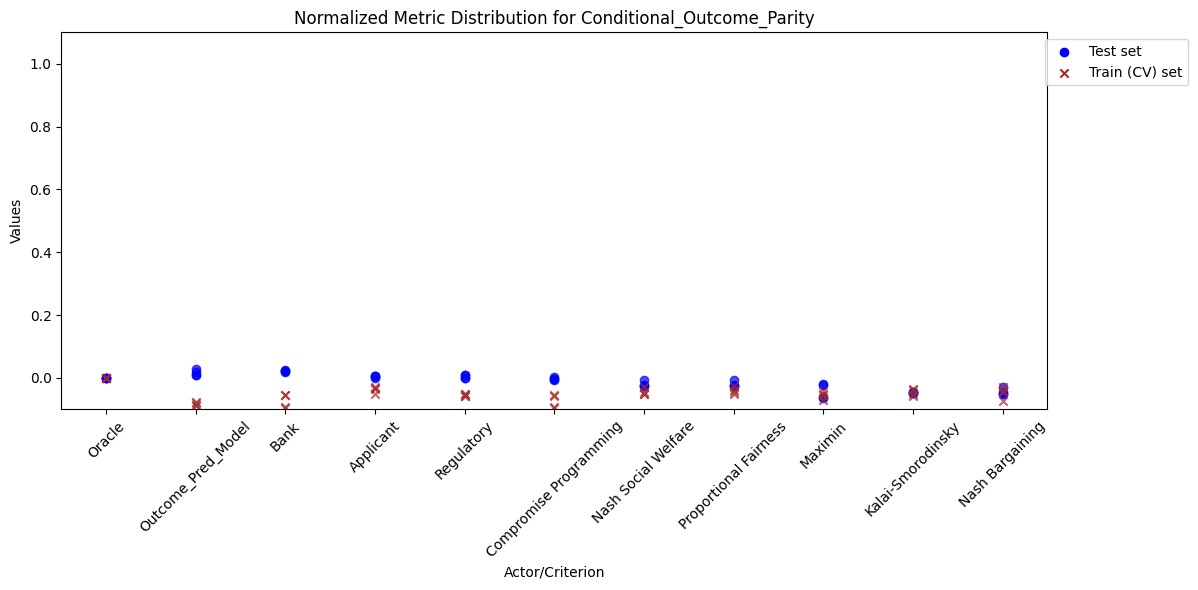

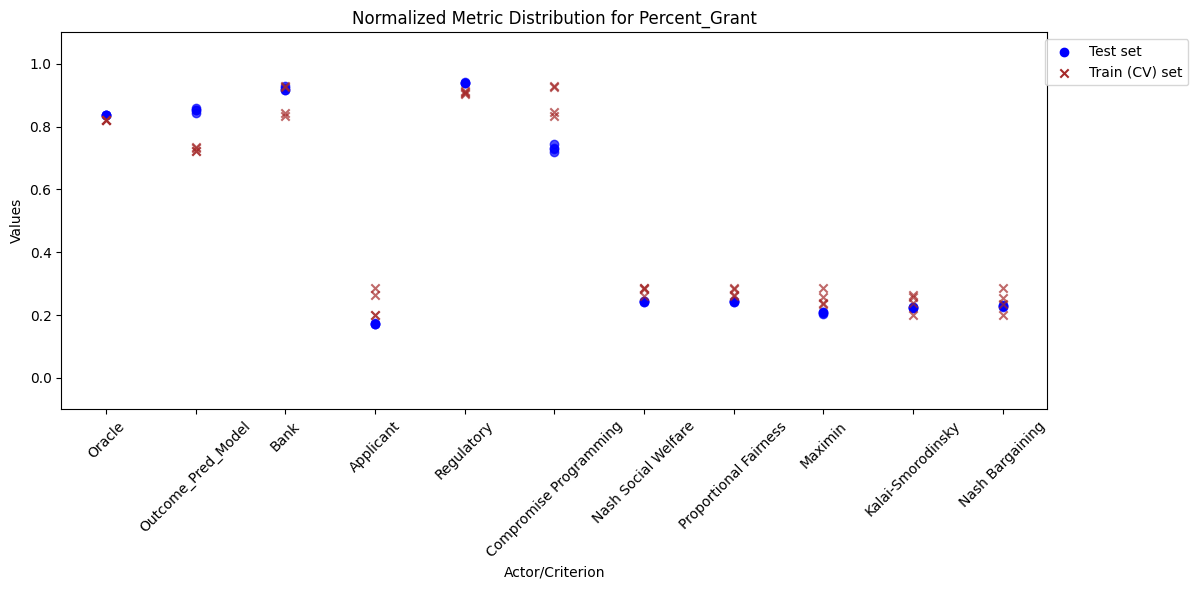

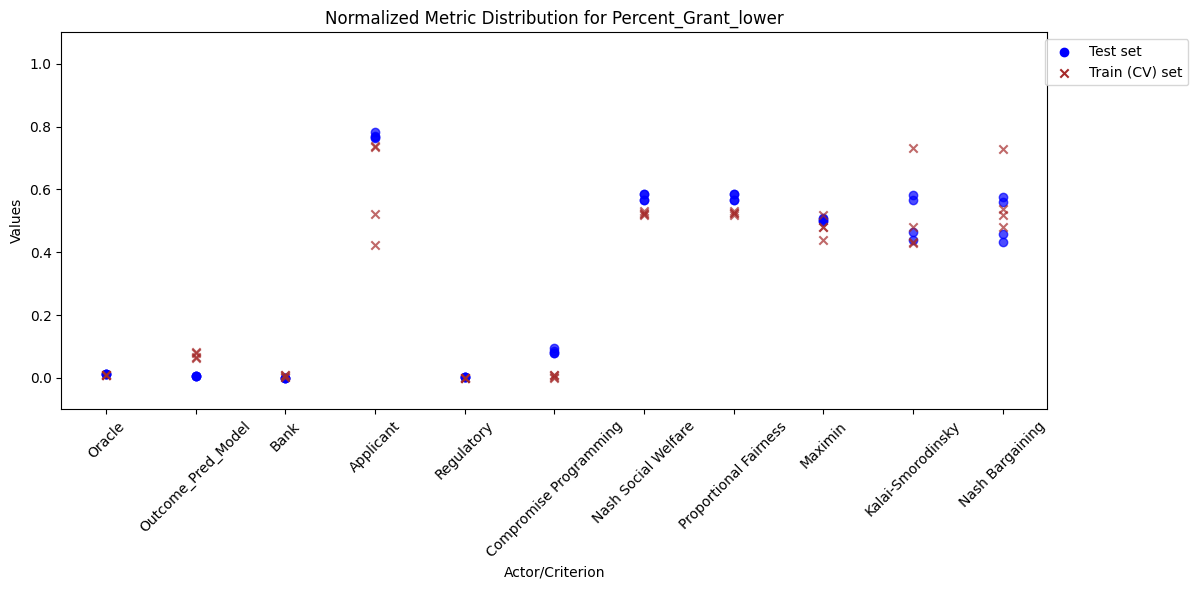

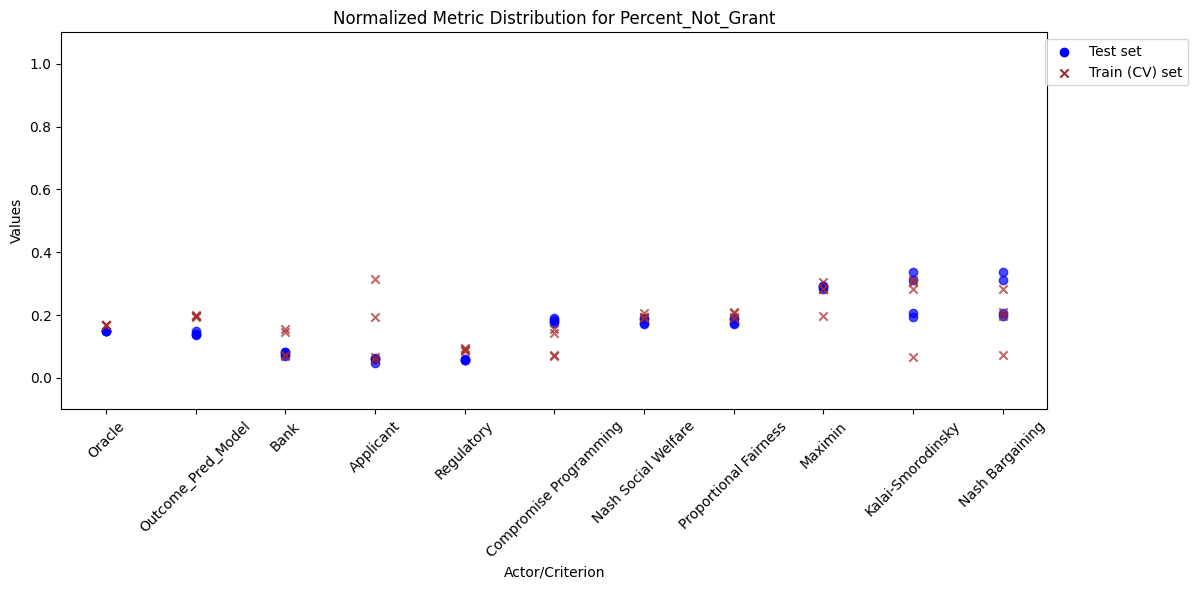

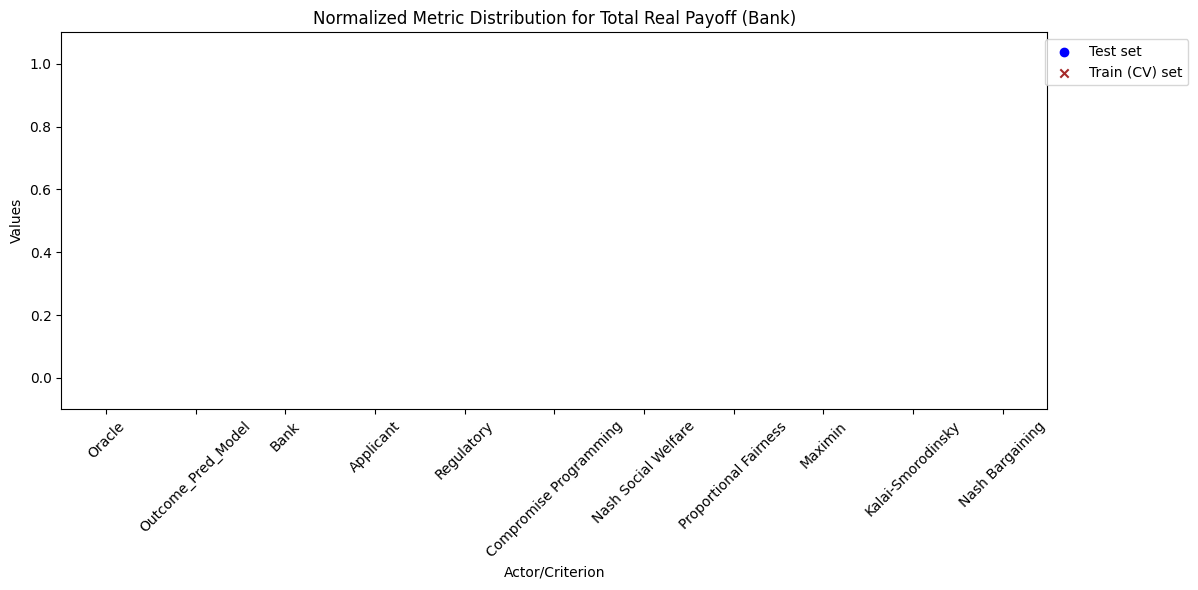

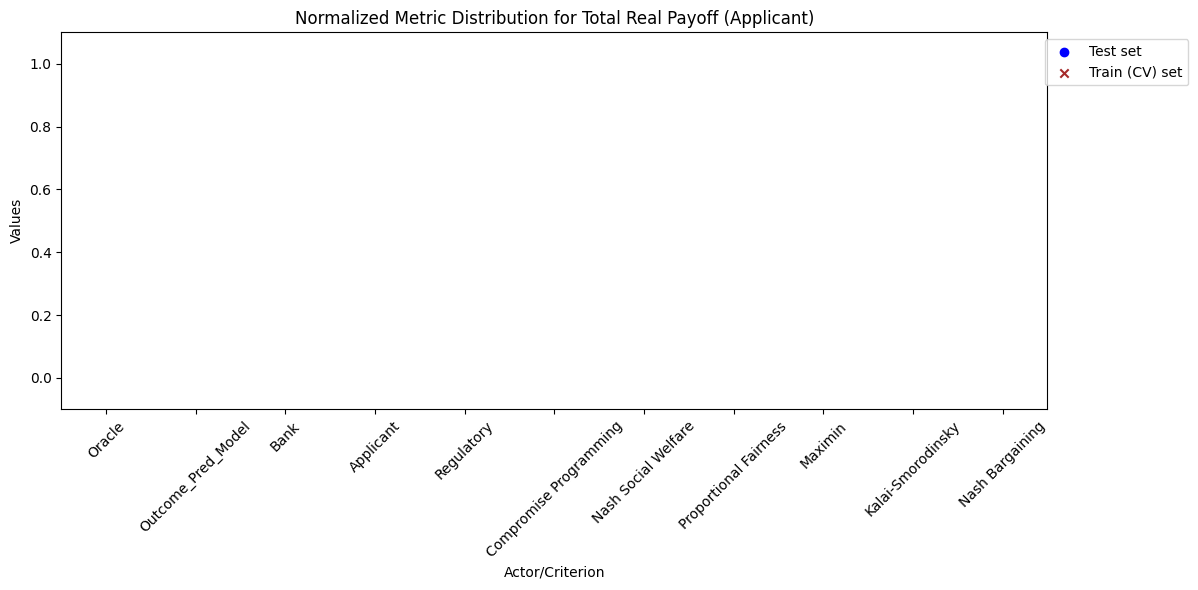

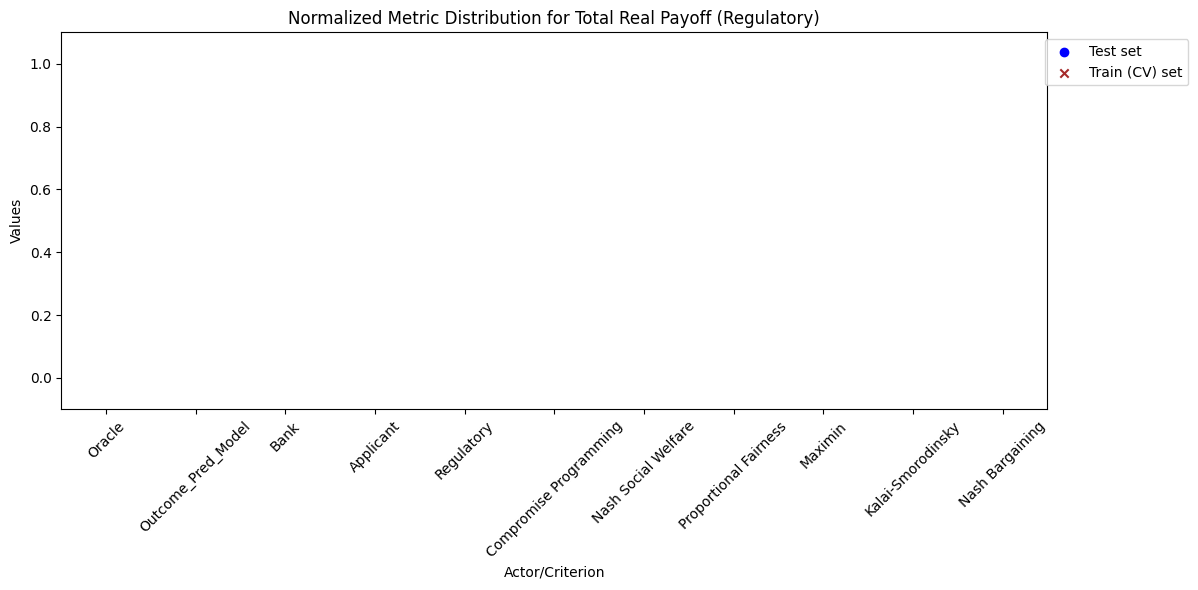

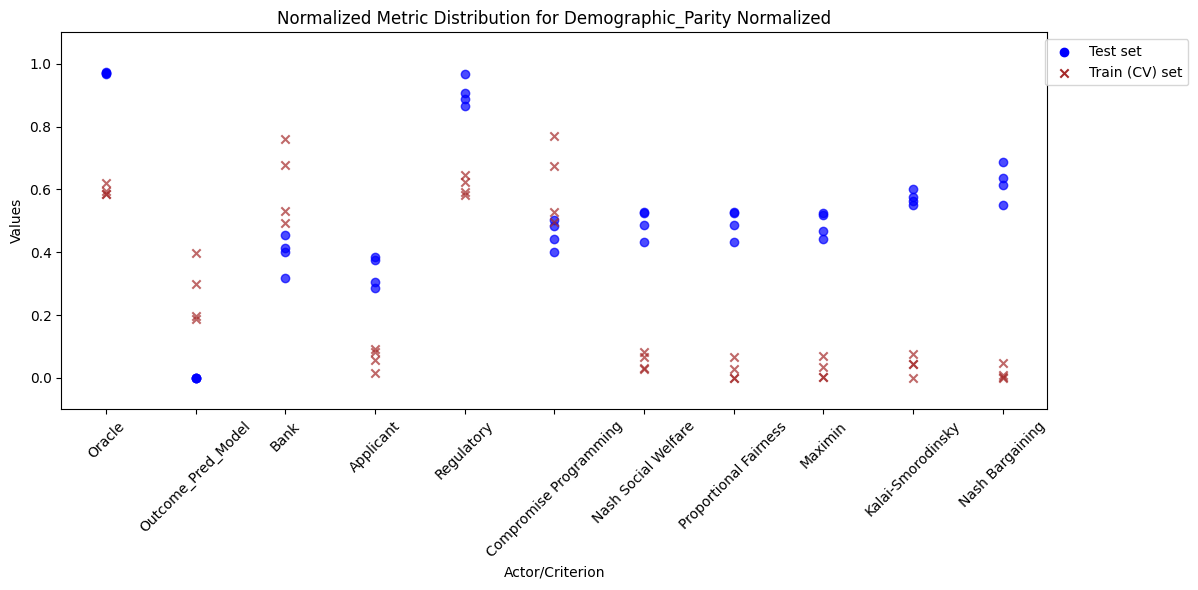

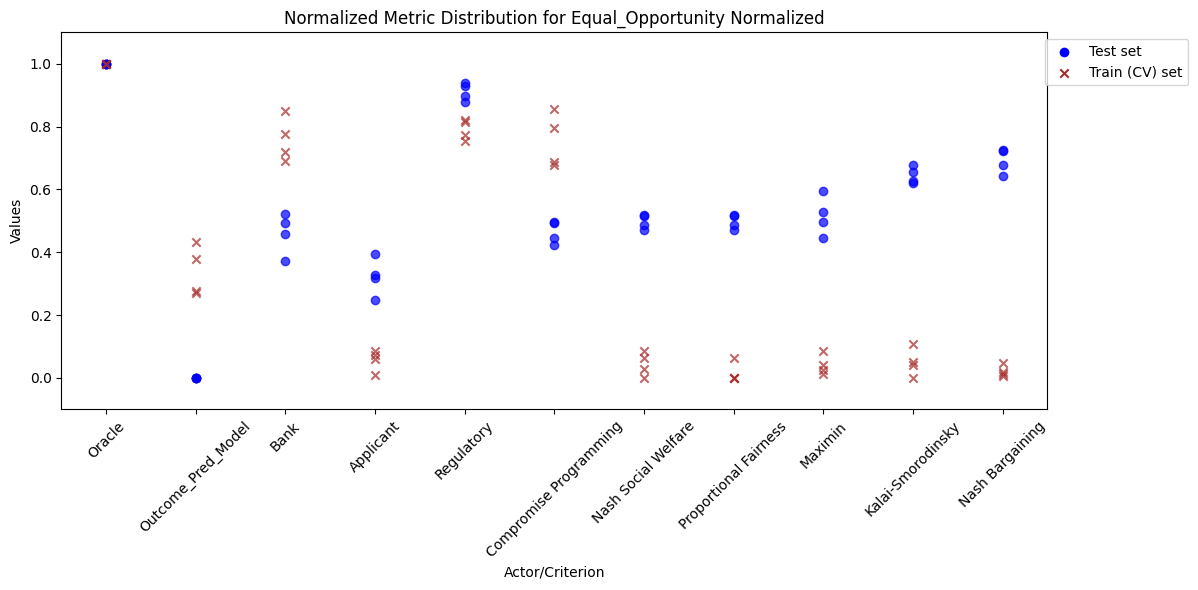

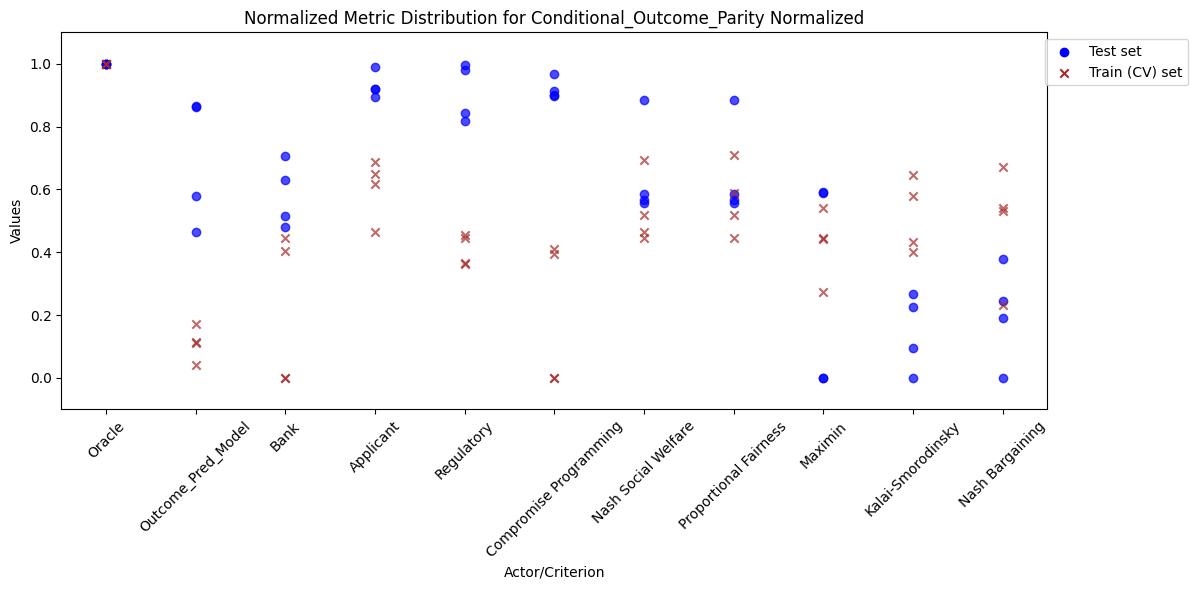

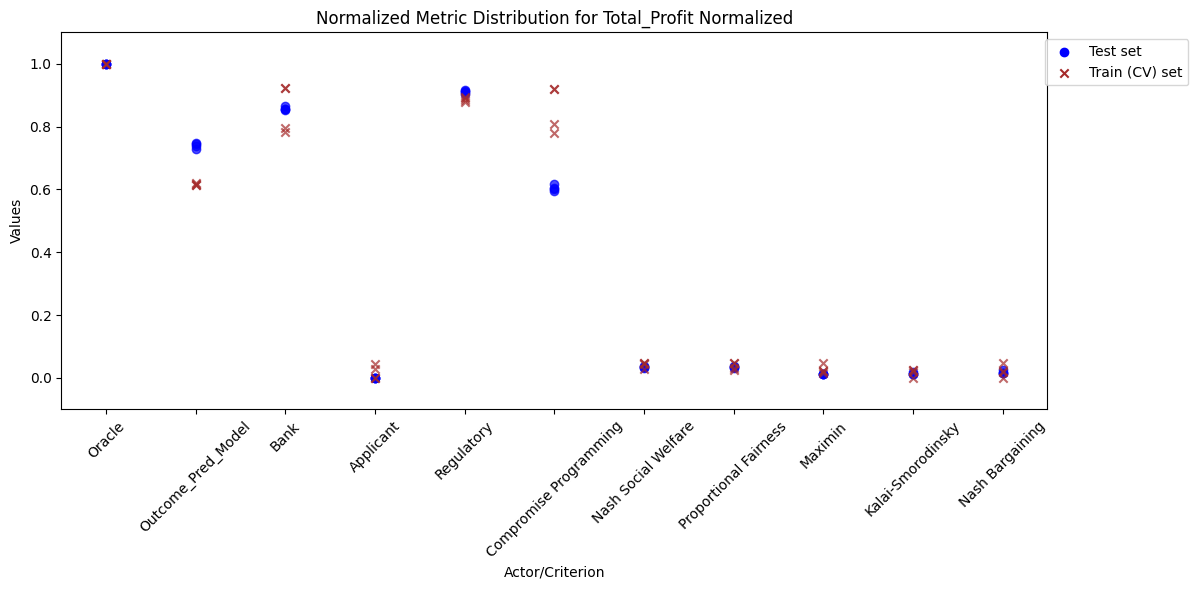

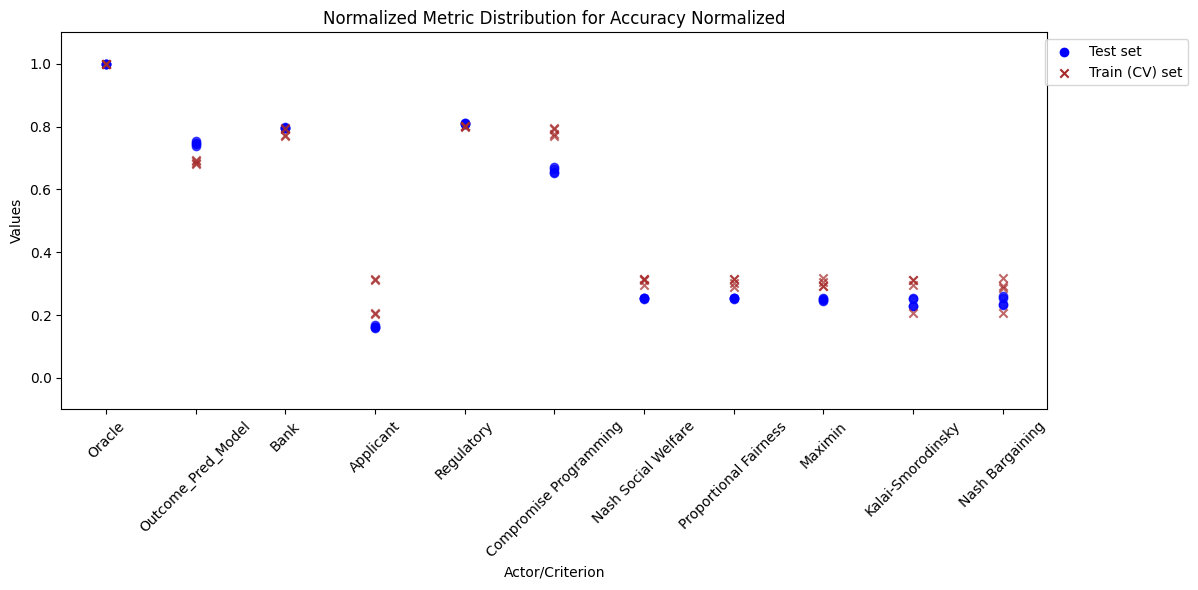

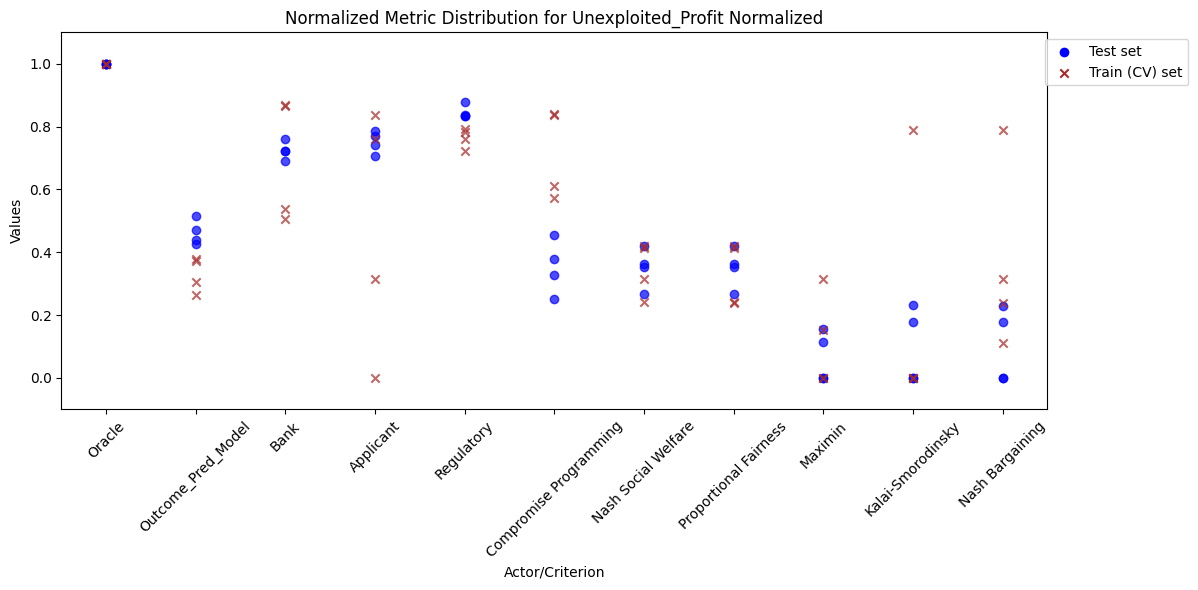

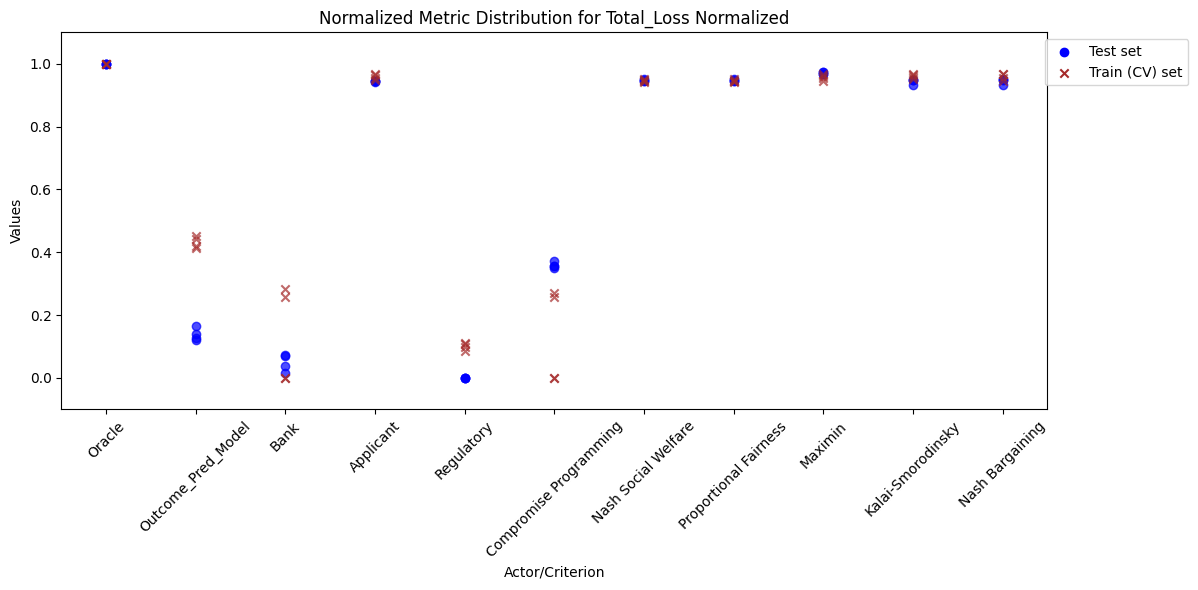

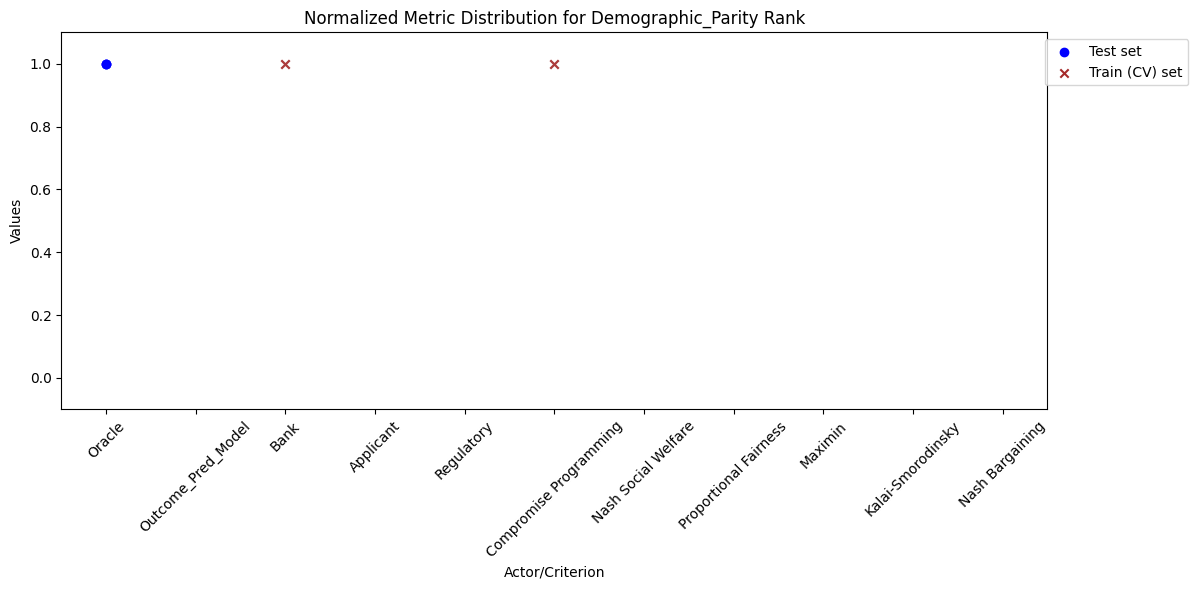

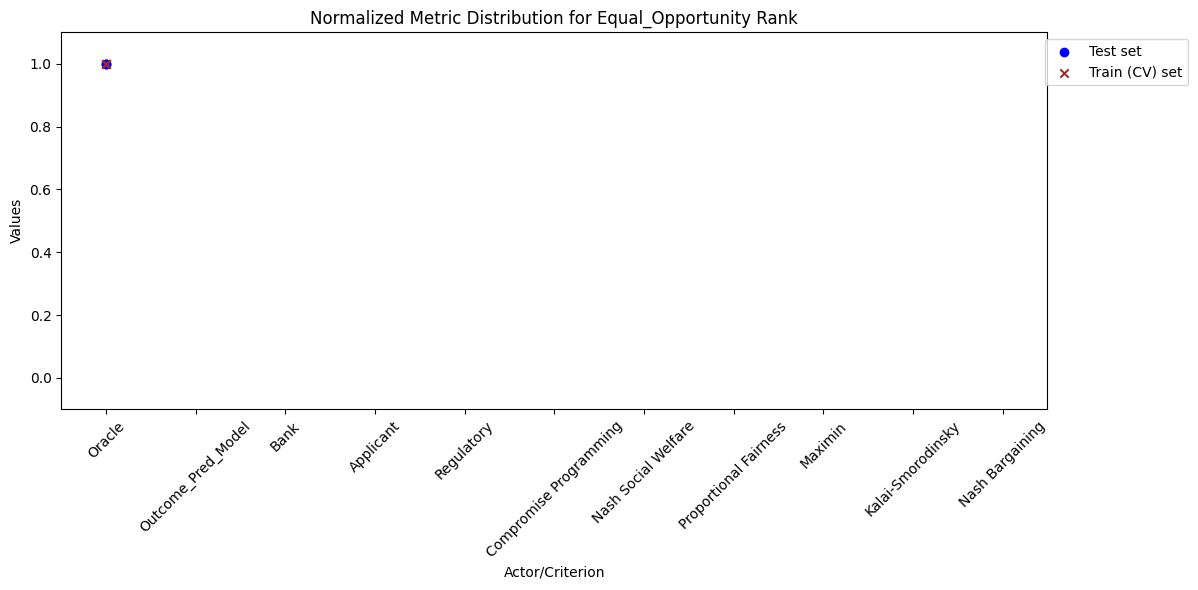

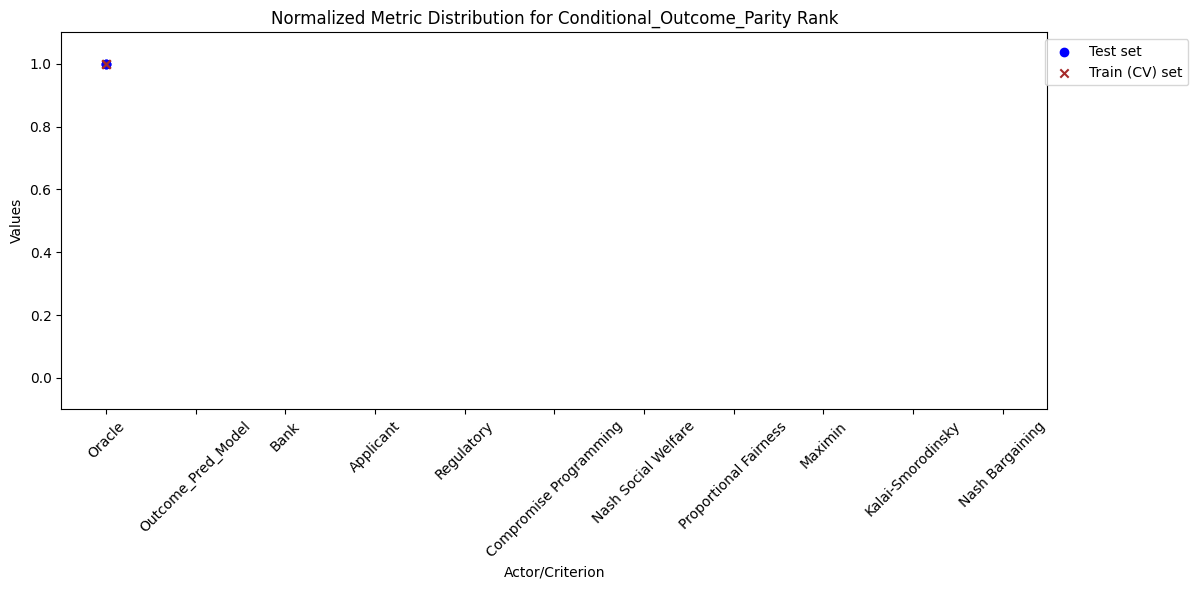

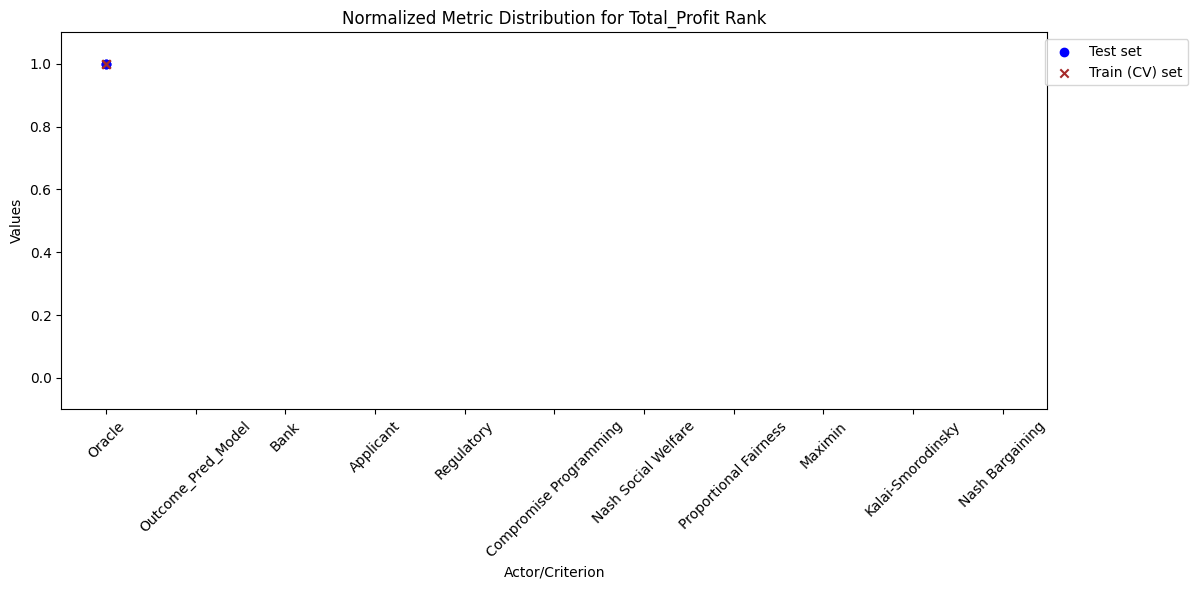

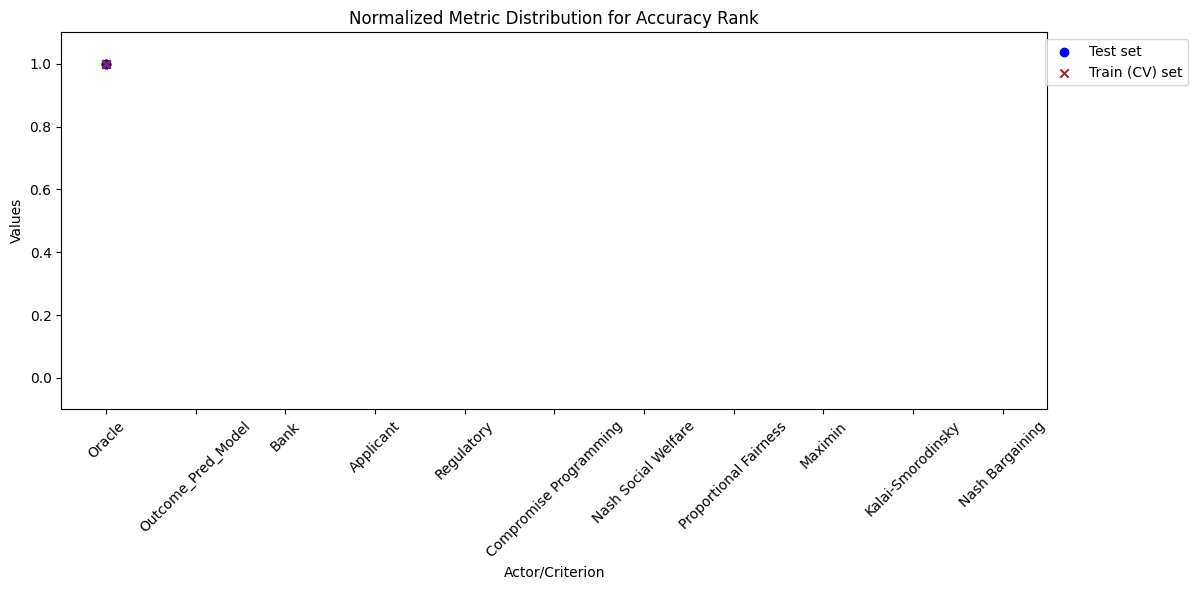

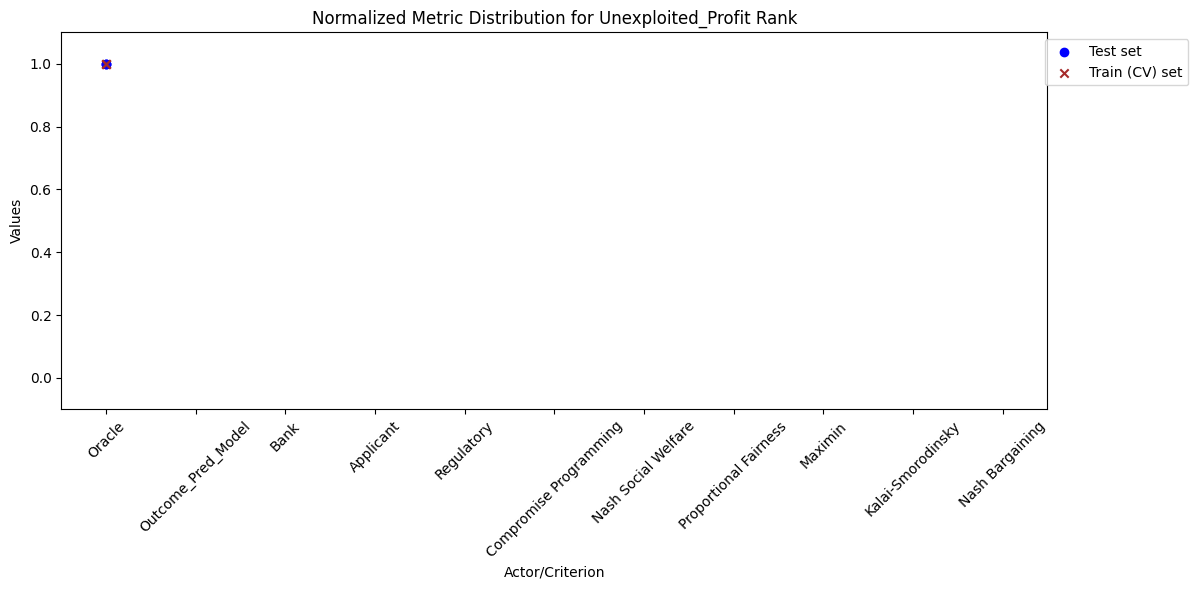

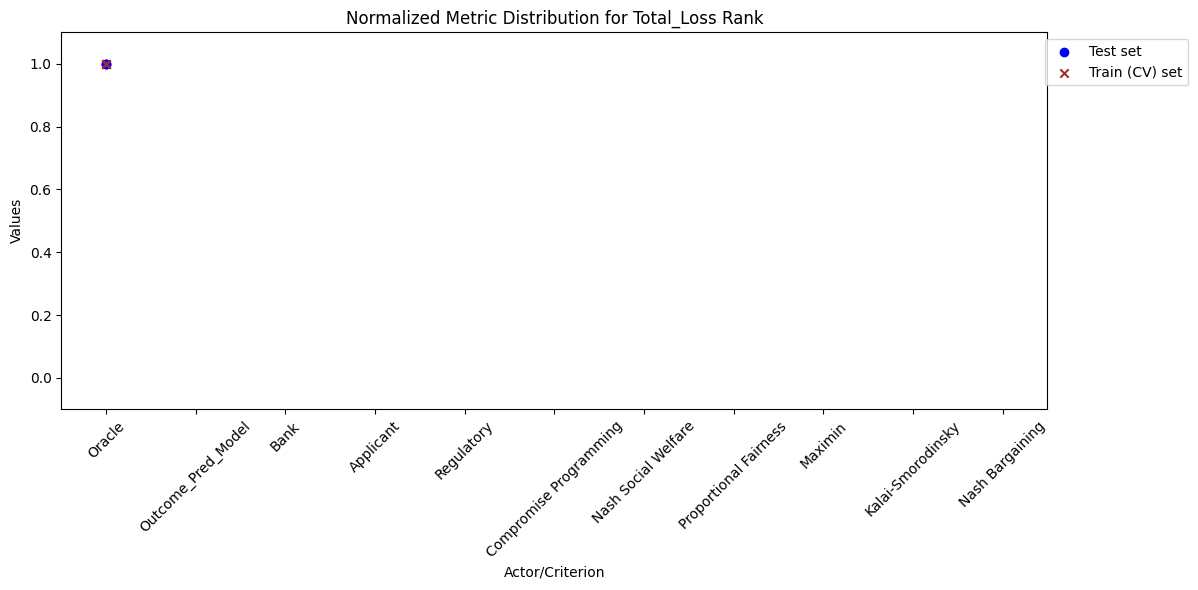

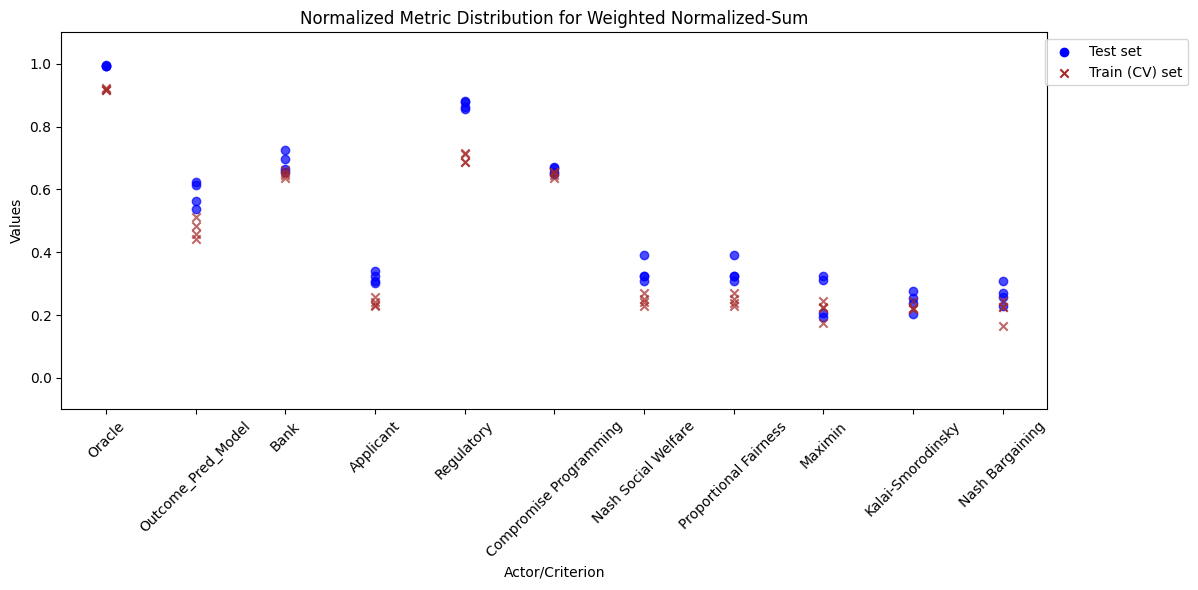

In [ ]:
import matplotlib.pyplot as plt

def visualize_dictionary_scatter_custom_order(data_dict, title_prefix="Comparison"):
    """
    Visualizes the distributions in the dictionary for each outer key (column name)
    and inner key (Actor/criterion) using scatter plots, with a fixed y-axis range (0-1),
    a generalized legend, and a custom x-axis order.
    
    Parameters:
        data_dict: dict
            Nested dictionary with the structure:
            {outer_key: {inner_key: {"results": [values], "results_cv": [values]}}}
        title_prefix: str
            Prefix for the plot titles.
    """
    # Custom X-axis order
    x_order = [
        'Oracle', 'Outcome_Pred_Model', 'Bank', 'Applicant', 'Regulatory', 
        'Compromise Programming', 'Nash Social Welfare', 'Proportional Fairness',
        'Maximin', 'Kalai-Smorodinsky', 'Nash Bargaining'
    ]
    
    for outer_key, inner_dict in data_dict.items():
        plt.figure(figsize=(12, 6))
        
        # Prepare data for scatter plot
        for actor in x_order:
            if actor in inner_dict:
                values = inner_dict[actor]
                # Scatter plot for "results"
                plt.scatter(
                    [actor] * len(values["results"]),  # X-axis: actor repeated for each value
                    values["results"],                # Y-axis: results values
                    alpha=0.7,
                    marker='o',                       # Marker for results
                    color='blue'
                )
                # Scatter plot for "results_cv"
                plt.scatter(
                    [actor] * len(values["results_cv"]),
                    values["results_cv"],
                    alpha=0.7,
                    marker='x',                       # Marker for results_cv
                    color='brown'
                )
        
        # Set consistent y-axis range
        plt.ylim(-0.1, 1.1)

        # Add labels and title
        plt.xlabel("Actor/Criterion")
        plt.ylabel("Values")
        plt.title(f"{title_prefix} for {outer_key}")
        plt.xticks(range(len(x_order)), x_order, rotation=45)
        
        # Add generalized legend
        plt.scatter([], [], color='blue', marker='o', label='Test set')
        plt.scatter([], [], color='brown', marker='x', label='Train (CV) set')
        plt.legend( loc='upper right', bbox_to_anchor=(1.15, 1))
        
        plt.tight_layout()
        plt.show()

# Use the updated function with a fixed y-axis range and custom order
visualize_dictionary_scatter_custom_order(comparison_dict, title_prefix="Normalized Metric Distribution")


In [20]:
results.T

,0,1,2,3,4,5,6,7,8,9,10
Actor/Criterion,Oracle,Regulatory,Compromise Programming,Bank,Outcome_Pred_Model,Applicant,Nash Social Welfare,Proportional Fairness,Maximin,Kalai-Smorodinsky,Nash Bargaining
Total_Profit,7969.019225,7254.11095,5030.72765,6887.005075,6024.601525,526.554775,768.067025,768.067025,612.528125,610.339875,638.519075
Total_Loss,74313.69,1203850.0,807000.0,1159675.0,1068175.0,138149.65,137062.58,137062.58,111072.31,134497.31,134497.31
Unexploited_Profit,0.0,553.878075,2076.056425,920.98395,1760.37,862.75005,2125.90515,2125.90515,2949.4542,3332.77125,3332.77125
Precision,1.0,0.368688,0.354932,0.354909,0.339716,0.352997,0.352639,0.352639,0.36827,0.348418,0.349776
Recall,1.0,0.350646,0.334014,0.348139,0.341848,0.32518,0.342441,0.342441,0.350375,0.352617,0.354859
F1 Score,1.0,0.347287,0.342424,0.345269,0.340722,0.145332,0.201918,0.201918,0.216255,0.212943,0.215935
Accuracy,1.0,0.81203,0.665414,0.796992,0.746241,0.167293,0.25,0.25,0.24812,0.253759,0.259398
Demographic_Parity,0.005328,0.017383,0.093291,-0.112421,-0.187806,0.117575,0.0884,0.0884,0.089099,0.07949,0.072414
Equal_Opportunity,0.0,0.020554,0.094598,-0.092153,-0.1705,0.11444,0.082062,0.082062,0.085714,0.063458,0.055007
